In [1]:
import torch



In [6]:
print(torch.cuda.is_available())

True


Testing Orography for LRES and HRES data

In [1]:
import os
import glob
import h5py
# Data file path
data_path = "/glade/derecho/scratch/mdarman/ERA5_hr_haiwen/data"

files = sorted(glob.glob(os.path.join(data_path, "*.h5")))
idx = 0
current_file = files[idx]

# Load the data
with h5py.File(current_file, 'r') as f:
    hr_data = f['input']
    print(hr_data.keys())

<KeysViewHDF5 ['10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature', '2m_temperature', 'angle_of_sub_gridscale_orography', 'anisotropy_of_sub_gridscale_orography', 'convective_available_potential_energy', 'geopotential_100', 'geopotential_1000', 'geopotential_150', 'geopotential_200', 'geopotential_250', 'geopotential_300', 'geopotential_400', 'geopotential_50', 'geopotential_500', 'geopotential_600', 'geopotential_700', 'geopotential_850', 'geopotential_925', 'geopotential_at_surface', 'high_vegetation_cover', 'lake_cover', 'lake_depth', 'land_sea_mask', 'logp', 'low_vegetation_cover', 'mean_sea_level_pressure', 'mean_surface_latent_heat_flux', 'mean_surface_net_long_wave_radiation_flux', 'mean_surface_net_short_wave_radiation_flux', 'mean_surface_sensible_heat_flux', 'mean_top_downward_short_wave_radiation_flux', 'mean_top_net_long_wave_radiation_flux', 'mean_top_net_short_wave_radiation_flux', 'sea_ice_cover', 'sea_surface_temperature', 'skin_temperature',

In [9]:

variables = ['temperature']#,'specific_humidity','u_component_of_wind','v_component_of_wind']
DEFAULT_MODEL_LEVELS = np.array([14,29,39,48,60,74,83,90,96,100,105,114,118,123,133,137])
# vars3d = []
# for variable in variables:
#     for level in DEFAULT_MODEL_LEVELS:
#         vars3d.append(f'{variable}_{level}')
vars3d = ["2m_temperature", "specific_humidity_133", "u_component_of_wind_83", "v_component_of_wind_83"]

surface_vars = ["2m_temperature",
    # "10m_u_component_of_wind",
    # "10m_v_component_of_wind",
    "surface_pressure",
]

diagnostic_variables = [
    # "mean_sea_level_pressure",
    # "total_cloud_cover",
    "total_precipitation_6hr",
    # "total_column_water_vapour",
    # "mean_surface_latent_heat_flux",
    # "mean_surface_net_long_wave_radiation_flux",
    # "mean_surface_net_short_wave_radiation_flux",
    # "mean_surface_sensible_heat_flux",
    #"mean_top_downward_short_wave_radiation_flux",
    # "mean_top_net_long_wave_radiation_flux",
    # "mean_top_net_short_wave_radiation_flux",

    #"snow_depth",

    # "skin_temperature",
    # "convective_available_potential_energy", 
]

bc_constant = [
    "geopotential_at_surface",
    "land_sea_mask",
    #"anisotropy_of_sub_gridscale_orography",
    #"angle_of_sub_gridscale_orography",
    #"high_vegetation_cover",
    #"lake_cover",
    #"lake_depth",
    #"low_vegetation_cover",
    #"slope_of_sub_gridscale_orography",
    #"soil_type",
    # "standard_deviation_of_filtered_subgrid_orography",
    # "standard_deviation_of_orography",
    #"type_of_high_vegetation",
    #"type_of_low_vegetation",
]

bc_varying = [
    "toa_incident_solar_radiation_6hr",
]

variable_list = vars3d + surface_vars + diagnostic_variables + bc_constant + bc_varying


Available variables: ['10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature', '2m_temperature', 'angle_of_sub_gridscale_orography', 'anisotropy_of_sub_gridscale_orography', 'convective_available_potential_energy', 'geopotential_100', 'geopotential_1000', 'geopotential_150', 'geopotential_200', 'geopotential_250', 'geopotential_300', 'geopotential_400', 'geopotential_50', 'geopotential_500', 'geopotential_600', 'geopotential_700', 'geopotential_850', 'geopotential_925', 'geopotential_at_surface', 'high_vegetation_cover', 'lake_cover', 'lake_depth', 'land_sea_mask', 'logp', 'low_vegetation_cover', 'mean_sea_level_pressure', 'mean_surface_latent_heat_flux', 'mean_surface_net_long_wave_radiation_flux', 'mean_surface_net_short_wave_radiation_flux', 'mean_surface_sensible_heat_flux', 'mean_top_downward_short_wave_radiation_flux', 'mean_top_net_long_wave_radiation_flux', 'mean_top_net_short_wave_radiation_flux', 'sea_ice_cover', 'sea_surface_temperature', 'skin_temper

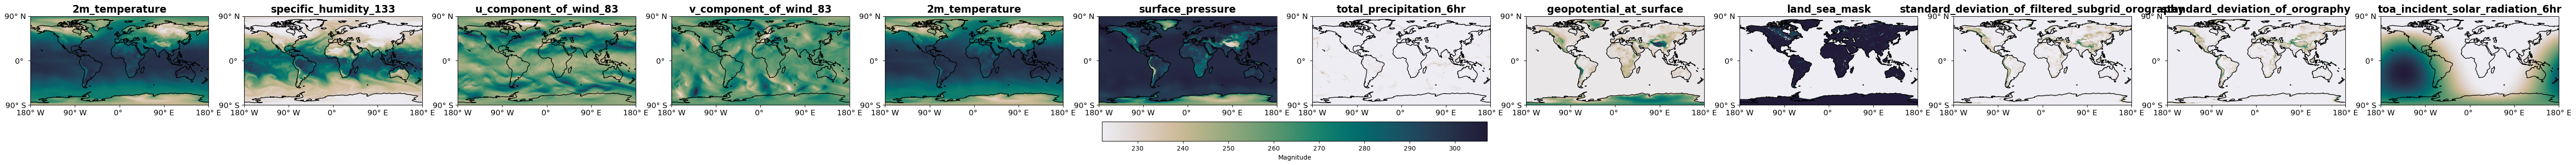

In [41]:
import os
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as ocean

# Define file path
data_path = "/glade/derecho/scratch/mdarman/ERA5_hr_haiwen/data"
files = sorted(glob.glob(os.path.join(data_path, "*.h5")))
idx = 0  # Index of the file to read
current_file = files[idx]

# Define the list of variables to plot
variables_to_plot = variable_list  # Change these to actual variable names

# Load the data
with h5py.File(current_file, 'r') as f:
    hr_data = f['input']
    available_keys = list(hr_data.keys())
    print("Available variables:", available_keys)
    
    # Ensure selected variables exist
    selected_variables = [var for var in variables_to_plot if var in available_keys]
    if not selected_variables:
        raise ValueError("None of the selected variables are available in the dataset.")
    
    # Load data for selected variables
    data_to_plot = [(hr_data[var][()], var) for var in selected_variables]

# Define coordinates
loncoords_hres = np.linspace(0, 360, 1440)
latcoords_hres = np.linspace(90, -90, 721)

# Set up the plotting parameters
projection = ccrs.PlateCarree()

# Create subplots
fig, axs = plt.subplots(1, len(data_to_plot), figsize=(6 * len(data_to_plot), 12), subplot_kw={'projection': projection})

if len(data_to_plot) == 1:
    axs = [axs]  # Ensure axs is iterable for a single subplot

# Latitude and Longitude tick marks
lat_ticks = np.arange(-90, 91, 90)  # Every 30 degrees from -90 to 90
lon_ticks = np.arange(-180, 181, 90)  # Every 60 degrees from -180 to 180
ims = []

for ax, (data, title) in zip(axs, data_to_plot):
    im = ax.pcolormesh(
        loncoords_hres, latcoords_hres, data, vmin=data.min(), vmax=data.max(),
        transform=projection, cmap=ocean.cm.rain
    )
    ax.coastlines()
    ax.set_xticks(lon_ticks, crs=projection)
    ax.set_yticks(lat_ticks, crs=projection)
    
    # Define latitude and longitude labels
    lat_labels = [f"{abs(lat)}° {'S' if lat < 0 else 'N' if lat > 0 else ''}" for lat in lat_ticks]
    lon_labels = [f"{abs(lon)}° {'W' if lon < 0 else 'E' if lon > 0 else ''}" for lon in lon_ticks]
    ax.set_xticklabels(lon_labels, fontsize=12)
    ax.set_yticklabels(lat_labels, fontsize=12)
    ax.set_title(f"{title}", fontsize=16, fontweight="bold")
    ims.append(im)

# Add a colorbar common to all subplots
cbar = fig.colorbar(ims[0], ax=axs, orientation="horizontal", fraction=0.046, pad=0.04)
cbar.set_label("Magnitude")

plt.show()


Geopotential Mean: 3723.77, Standard Deviation: 8349.27


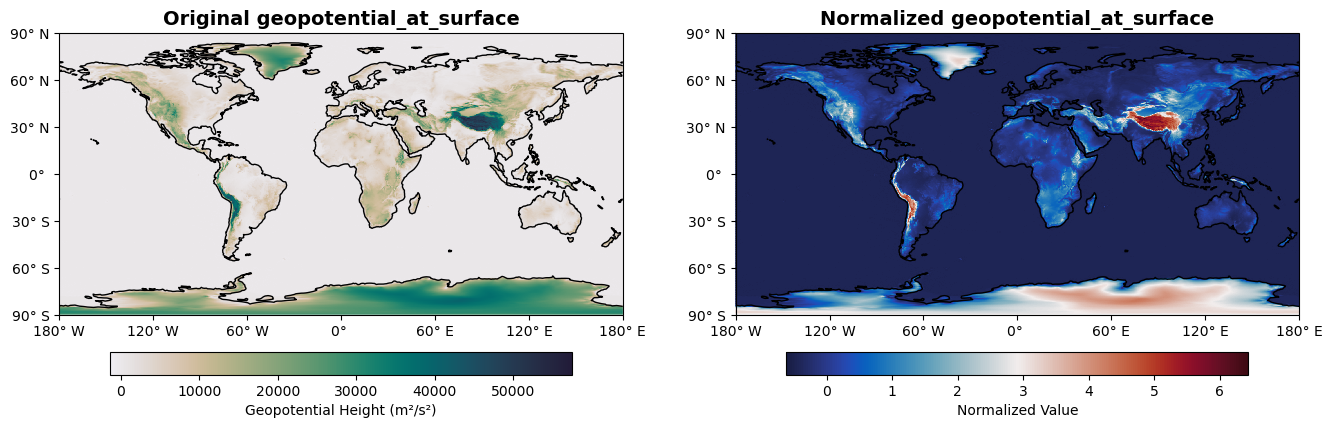

In [42]:
import os
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as ocean

# Define file path
data_path = "/glade/derecho/scratch/mdarman/ERA5_hr_haiwen/data"
files = sorted(glob.glob(os.path.join(data_path, "*.h5")))
idx = 0  # Index of the file to read
current_file = files[idx]

# Variable to extract
variable_name = "geopotential_at_surface"

# Load the data
with h5py.File(current_file, 'r') as f:
    hr_data = f['input']
    if variable_name not in hr_data:
        raise ValueError(f"{variable_name} not found in dataset.")

    # Extract variable data
    geo_data = hr_data[variable_name][()]
    
# Compute mean and standard deviation
geo_mean = np.mean(geo_data)
geo_std = np.std(geo_data)

# Normalize the data
geo_normalized = (geo_data - geo_mean) / geo_std

print(f"Geopotential Mean: {geo_mean:.2f}, Standard Deviation: {geo_std:.2f}")

# Define coordinates
loncoords_hres = np.linspace(0, 360, 1440)
latcoords_hres = np.linspace(90, -90, 721)

# Set up the plotting parameters
projection = ccrs.PlateCarree()

# Create subplots for original and normalized data
fig, axs = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={'projection': projection})

# Latitude and Longitude tick marks
lat_ticks = np.arange(-90, 91, 30)  
lon_ticks = np.arange(-180, 181, 60)  

# Plot original geopotential data
im1 = axs[0].pcolormesh(
    loncoords_hres, latcoords_hres, geo_data, 
    transform=projection, cmap=ocean.cm.rain
)
axs[0].coastlines()
axs[0].set_title(f"Original {variable_name}", fontsize=14, fontweight="bold")

# Plot normalized geopotential data
im2 = axs[1].pcolormesh(
    loncoords_hres, latcoords_hres, geo_normalized, 
    transform=projection, cmap=ocean.cm.balance
)
axs[1].coastlines()
axs[1].set_title(f"Normalized {variable_name}", fontsize=14, fontweight="bold")

# Set ticks and labels
for ax in axs:
    ax.set_xticks(lon_ticks, crs=projection)
    ax.set_yticks(lat_ticks, crs=projection)
    lat_labels = [f"{abs(lat)}° {'S' if lat < 0 else 'N' if lat > 0 else ''}" for lat in lat_ticks]
    lon_labels = [f"{abs(lon)}° {'W' if lon < 0 else 'E' if lon > 0 else ''}" for lon in lon_ticks]
    ax.set_xticklabels(lon_labels, fontsize=10)
    ax.set_yticklabels(lat_labels, fontsize=10)

# Add colorbars
cbar1 = fig.colorbar(im1, ax=axs[0], orientation="horizontal", fraction=0.05, pad=0.08)
cbar1.set_label("Geopotential Height (m²/s²)")
cbar2 = fig.colorbar(im2, ax=axs[1], orientation="horizontal", fraction=0.05, pad=0.08)
cbar2.set_label("Normalized Value")

plt.show()

Geopotential Mean: 3723.77, Standard Deviation: 8349.27
Normalized geopotential saved to /glade/derecho/scratch/mdarman/lucie/oro.npz
Successfully loaded and verified oro.npz!


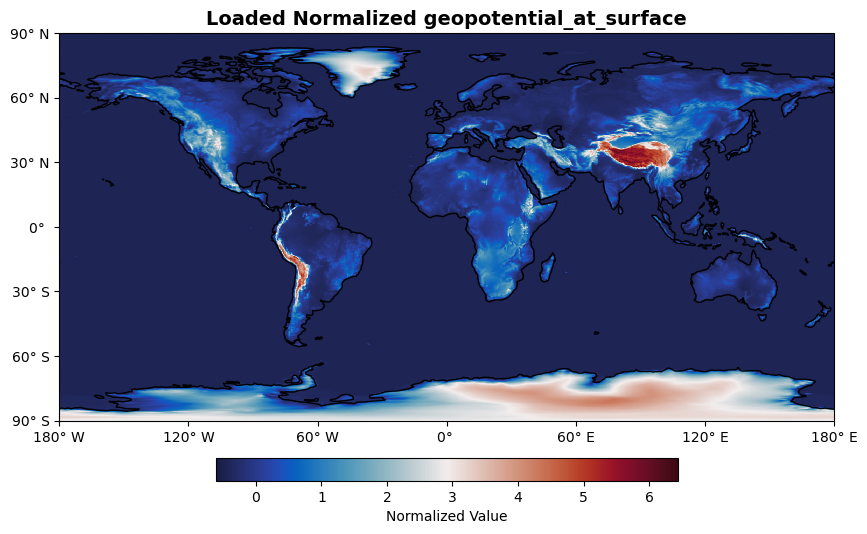

In [46]:
import os
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as ocean

# Define file path
data_path = "/glade/derecho/scratch/mdarman/ERA5_hr_haiwen/data"
files = sorted(glob.glob(os.path.join(data_path, "*.h5")))
idx = 0  # Index of the file to read
current_file = files[idx]

# Variable to extract
variable_name = "geopotential_at_surface"

# Load the data
with h5py.File(current_file, 'r') as f:
    hr_data = f['input']
    if variable_name not in hr_data:
        raise ValueError(f"{variable_name} not found in dataset.")

    # Extract variable data
    geo_data = hr_data[variable_name][()]

# Compute mean and standard deviation
geo_mean = np.mean(geo_data)
geo_std = np.std(geo_data)

# Normalize the data
geo_normalized = (geo_data - geo_mean) / geo_std

print(f"Geopotential Mean: {geo_mean:.2f}, Standard Deviation: {geo_std:.2f}")

# Save the normalized geopotential data
save_path = "/glade/derecho/scratch/mdarman/lucie/oro.npz"
np.savez(save_path, geopotential_normalized=geo_normalized)

print(f"Normalized geopotential saved to {save_path}")

# Load and verify the saved data
loaded_data = np.load(save_path)
geo_loaded = loaded_data["geopotential_normalized"]

# Ensure the loaded data matches the saved data
assert np.allclose(geo_normalized, geo_loaded), "Loaded data does not match the saved data!"

print("Successfully loaded and verified oro.npz!")

# Define coordinates
loncoords_hres = np.linspace(0, 360, 1440)
latcoords_hres = np.linspace(90, -90, 721)

# Set up the plotting parameters
projection = ccrs.PlateCarree()

# Plot the loaded normalized data
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection})

# Latitude and Longitude tick marks
lat_ticks = np.arange(-90, 91, 30)  
lon_ticks = np.arange(-180, 181, 60)  

# Plot loaded data
im = ax.pcolormesh(
    loncoords_hres, latcoords_hres, geo_loaded, 
    transform=projection, cmap=ocean.cm.balance
)
ax.coastlines()
ax.set_xticks(lon_ticks, crs=projection)
ax.set_yticks(lat_ticks, crs=projection)

# Define latitude and longitude labels
lat_labels = [f"{abs(lat)}° {'S' if lat < 0 else 'N' if lat > 0 else ''}" for lat in lat_ticks]
lon_labels = [f"{abs(lon)}° {'W' if lon < 0 else 'E' if lon > 0 else ''}" for lon in lon_ticks]
ax.set_xticklabels(lon_labels, fontsize=10)
ax.set_yticklabels(lat_labels, fontsize=10)
ax.set_title(f"Loaded Normalized {variable_name}", fontsize=14, fontweight="bold")

# Add colorbar
cbar = fig.colorbar(im, ax=ax, orientation="horizontal", fraction=0.05, pad=0.08)
cbar.set_label("Normalized Value")

plt.show()


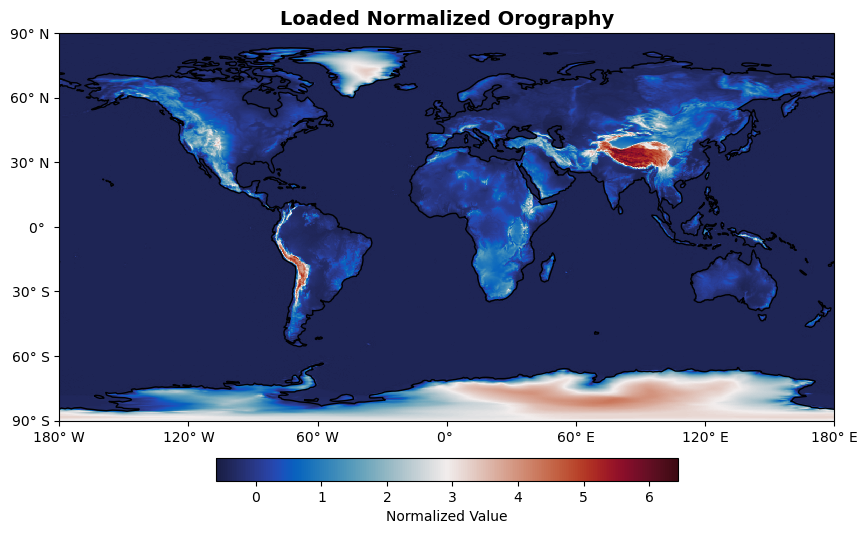

In [58]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as ocean

# Load the saved normalized geopotential data
file_path = "/glade/derecho/scratch/mdarman/lucie/oro.npz"
loaded_data = np.load(file_path)['geopotential_normalized']

# Convert to torch tensor and add required dimensions
oro = torch.tensor(loaded_data).unsqueeze(0).unsqueeze(1)  # Shape: [1, 1, H, W]

# Extract data for plotting
oro_plot = oro.squeeze().numpy()  # Convert back to numpy for plotting

# Define coordinates
loncoords_hres = np.linspace(0, 360, 1440)
latcoords_hres = np.linspace(90, -90, 721)

# Set up the plotting parameters
projection = ccrs.PlateCarree()

# Plot the loaded normalized data
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection})

# Latitude and Longitude tick marks
lat_ticks = np.arange(-90, 91, 30)  
lon_ticks = np.arange(-180, 181, 60)  

# Plot the data
im = ax.pcolormesh(
    loncoords_hres, latcoords_hres, oro_plot, 
    transform=projection, cmap=ocean.cm.balance
)
ax.coastlines()
ax.set_xticks(lon_ticks, crs=projection)
ax.set_yticks(lat_ticks, crs=projection)

# Define latitude and longitude labels
lat_labels = [f"{abs(lat)}° {'S' if lat < 0 else 'N' if lat > 0 else ''}" for lat in lat_ticks]
lon_labels = [f"{abs(lon)}° {'W' if lon < 0 else 'E' if lon > 0 else ''}" for lon in lon_ticks]
ax.set_xticklabels(lon_labels, fontsize=10)
ax.set_yticklabels(lat_labels, fontsize=10)
ax.set_title("Loaded Normalized Orography", fontsize=14, fontweight="bold")

# Add colorbar
cbar = fig.colorbar(im, ax=ax, orientation="horizontal", fraction=0.05, pad=0.08)
cbar.set_label("Normalized Value")

plt.show()

Mean: -0.037244636565446854, Std: 0.9018841981887817
Loaded shape: torch.Size([2, 3, 721, 1440])


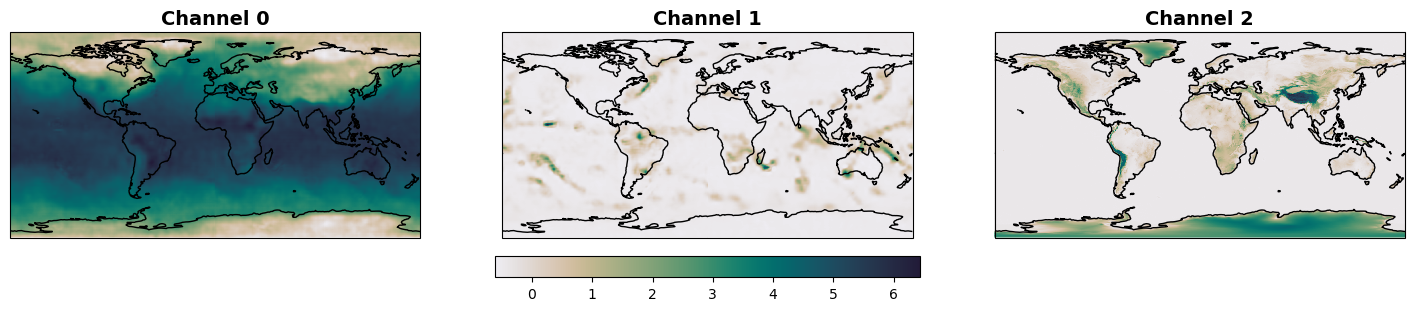

In [63]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as ocean

# Define file path
load_path = "/glade/derecho/scratch/mdarman/lucie/hres_with_oro.npy"

# Load the saved numpy array
hres_with_oro = np.load(load_path)

# Convert to torch tensor for easier manipulation
hres_with_oro = torch.tensor(hres_with_oro)

# Compute mean & std for the whole dataset
mean_value = hres_with_oro.mean().item()
std_value = hres_with_oro.std().item()

print(f"Mean: {mean_value}, Std: {std_value}")
print(f"Loaded shape: {hres_with_oro.shape}")  # Should be (B, C+1, W, H)

# Define coordinates
loncoords_hres = np.linspace(0, 360, 1440)
latcoords_hres = np.linspace(90, -90, 721)

# Set up the plotting parameters
projection = ccrs.PlateCarree()

# Extract one batch to plot
batch_idx = 0  # Adjust if needed
batch = hres_with_oro[batch_idx]  # Shape: (C+1, W, H)

num_channels = batch.shape[0]  # Number of channels
fig, axs = plt.subplots(1, num_channels, figsize=(6 * num_channels, 6), subplot_kw={'projection': projection})

# Ensure axs is iterable for a single channel
if num_channels == 1:
    axs = [axs]

# Plot each channel separately
for i, ax in enumerate(axs):
    data = batch[i, :, :].numpy()  # Extract the i-th channel

    im = ax.pcolormesh(
        loncoords_hres, latcoords_hres, data,
        vmin=data.min(), vmax=data.max(),
        transform=projection, cmap=ocean.cm.rain
    )

    ax.coastlines()
    ax.set_title(f"Channel {i}", fontsize=14, fontweight="bold")

# Add a colorbar common to all subplots
fig.colorbar(im, ax=axs, orientation="horizontal", fraction=0.046, pad=0.04)

plt.show()

Mean: -0.010636246763169765, Std: 1.0042848587036133
Loaded shape: torch.Size([2, 8, 721, 1440])


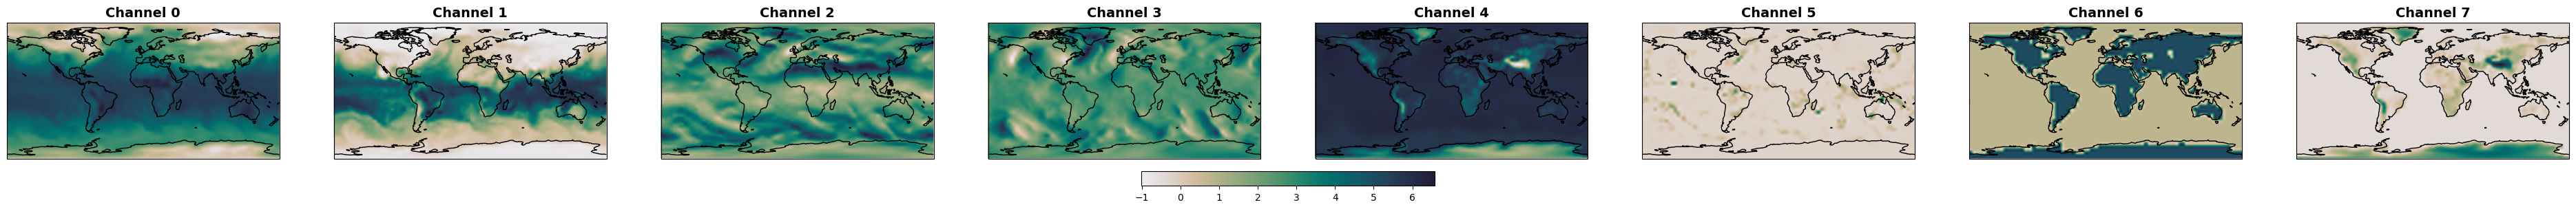

In [70]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as ocean

# Define file path
load_path = "/glade/derecho/scratch/mdarman/lucie/lres_upsampled.npy"

# Load the saved numpy array
hres_with_oro = np.load(load_path)

# Convert to torch tensor for easier manipulation
hres_with_oro = torch.tensor(hres_with_oro)

# Compute mean & std for the whole dataset
mean_value = hres_with_oro.mean().item()
std_value = hres_with_oro.std().item()

print(f"Mean: {mean_value}, Std: {std_value}")
print(f"Loaded shape: {hres_with_oro.shape}")  # Should be (B, C+1, W, H)

# Define coordinates
loncoords_hres = np.linspace(0, 360, 1440)
latcoords_hres = np.linspace(90, -90, 721)

# Set up the plotting parameters
projection = ccrs.PlateCarree()

# Extract one batch to plot
batch_idx = 0  # Adjust if needed
batch = hres_with_oro[batch_idx]  # Shape: (C+1, W, H)

num_channels = batch.shape[0]  # Number of channels
fig, axs = plt.subplots(1, num_channels, figsize=(6 * num_channels, 6), subplot_kw={'projection': projection})

# Ensure axs is iterable for a single channel
if num_channels == 1:
    axs = [axs]

# Plot each channel separately
for i, ax in enumerate(axs):
    data = batch[i, :, :].numpy()  # Extract the i-th channel

    im = ax.pcolormesh(
        loncoords_hres, latcoords_hres, data,
        vmin=data.min(), vmax=data.max(),
        transform=projection, cmap=ocean.cm.rain
    )

    ax.coastlines()
    ax.set_title(f"Channel {i}", fontsize=14, fontweight="bold")

# Add a colorbar common to all subplots
fig.colorbar(im, ax=axs, orientation="horizontal", fraction=0.046, pad=0.04)

plt.show()

In [72]:
print(hres_with_oro.shape)
print(hres_with_oro.mean(axis=(0, 2, 3)))
print(hres_with_oro.std(axis=(0, 2, 3)))

torch.Size([2, 8, 721, 1440])
tensor([-0.1139, -0.0622,  0.0879,  0.0112,  0.0165,  0.0108, -0.0106, -0.0248])
tensor([1.0061, 1.0121, 1.0543, 1.0228, 0.9588, 1.0189, 0.9822, 0.9630])


In [76]:
import glob
import os
import h5py
import torch
import numpy as np
from torch.utils.data import Dataset

class ClimateDataset2(Dataset):
    def __init__(self, input_dir_lr, input_dir_hr, input_vars, output_vars, lr_lats, lr_lons,
                 year_range=None, normalize=False, input_normalization_file=None, output_normalization_file=None):
        self.input_dir_lr = input_dir_lr
        self.input_dir_hr = input_dir_hr
        self.input_vars = input_vars
        self.output_vars = output_vars
        self.lr_lats = lr_lats
        self.lr_lons = lr_lons
        self.normalize = normalize
        self.year_range = year_range


        # Get all files in directories and sort them chronologically
        self.lr_files = sorted(glob.glob(os.path.join(self.input_dir_lr, "*.h5")))  # Hourly files
        self.hr_files = sorted(glob.glob(os.path.join(self.input_dir_hr, "*.h5")))  # 6-hourly files

        # Filter files based on the year range
        if self.year_range:
            start_year, end_year = self.year_range
            self.lr_files = [f for f in self.lr_files if start_year <= int(os.path.basename(f).split('_')[0]) <= end_year]
            self.hr_files = [f for f in self.hr_files if start_year <= int(os.path.basename(f).split('_')[0]) <= end_year]
            print("Length of lr_files: ", len(self.lr_files))
            print("Length of hr_files: ", len(self.hr_files))

        # Adjust LR files to every 6th file to align with HR files
        self.lr_files_six_hourly = self.lr_files[::6]

        # Use limited data for debugging
        # self.hr_files = self.hr_files[:5]
        # self.lr_files_six_hourly = self.lr_files_six_hourly[:5]
        
        assert len(self.hr_files) == len(self.lr_files_six_hourly), \
            "Mismatch between high-resolution and low-resolution timesteps."

        print(len(self.hr_files), len(self.lr_files_six_hourly))
        # Pre-filter files to remove those with NaN values
        valid_lr_files = []
        valid_hr_files = []
        for lr_file, hr_file in zip(self.lr_files_six_hourly, self.hr_files):
            try:
                # Load HR data and check for NaNs
                with h5py.File(hr_file, 'r') as f:
                    hr_data = {var: f['input'][var][:] for var in self.output_vars}
                    if any(np.isnan(hr_data[var]).any() for var in self.output_vars):
                        continue  # Skip this file if NaNs are present

                # Load LR data and check for NaNs
                with h5py.File(lr_file, 'r') as f:
                    lr_data = {var: np.flipud(f['input'][var][:]) for var in self.input_vars}
                    if any(np.isnan(lr_data[var]).any() for var in self.input_vars):
                        continue  # Skip this file if NaNs are present

                # If no NaNs are found, add to valid files list
                valid_lr_files.append(lr_file)
                valid_hr_files.append(hr_file)

            except Exception as e:
                print(f"Error reading files {lr_file} or {hr_file}: {e}")
        
        self.lr_files_six_hourly = valid_lr_files
        self.hr_files = valid_hr_files

        print(f"Found {len(self.hr_files)} valid files.")
        print(f"Found {len(self.lr_files_six_hourly)} valid files.")
        # Load normalization parameters if normalization is enabled
        if self.normalize:
            # Load input normalization parameters
            if input_normalization_file:
                input_norm_data = np.load(input_normalization_file, allow_pickle=True)
                self.input_mean_std = {var: (input_norm_data[var].item()['mean'], input_norm_data[var].item()['std']) 
                                       for var in self.input_vars}
            else:
                raise ValueError("Input normalization file path is required when normalization is enabled.")

            # Load output normalization parameters
            if output_normalization_file:
                output_norm_data = np.load(output_normalization_file, allow_pickle=True)
                self.output_mean_std = {var: (output_norm_data[var].item()['mean'], output_norm_data[var].item()['std']) 
                                        for var in self.output_vars}
            else:
                raise ValueError("Output normalization file path is required when normalization is enabled.")

    def __len__(self):
        return len(self.hr_files)

    def __getitem__(self, idx):
        # Load HR data for the current timestep
        hr_file_path = self.hr_files[idx]
        with h5py.File(hr_file_path, 'r') as f:
            hr_data = {var: f['input'][var][:] for var in self.output_vars}
            # hr_lats = f['Latitude'][:]
            # hr_lons = f['Longitude'][:]

        # if "tp6hr" in hr_data:
        #     # print(((hr_data["tp6hr"] + 1e-8)<0).any(), hr_data["tp6hr"].min())
        #     # hr_data["tp6hr"] = np.log(hr_data["tp6hr"] + 1e-3)  # Adding a small constant to avoid log(0)
        #     pass
        # Normalize HR data if needed
        if self.normalize:
            hr_data = {var: (hr_data[var] - self.output_mean_std[var][0]) / self.output_mean_std[var][1]
                       for var in self.output_vars}

        # Load corresponding LR data (every 6th LR file matches each HR timestep)
        lr_file_path = self.lr_files_six_hourly[idx]
        with h5py.File(lr_file_path, 'r') as f:
            lr_data = {var: np.flipud(f['input'][var][:]) for var in self.input_vars}

        # if 'orography' in lr_data:
        #     lr_data['orography'] = (lr_data['orography'] - lr_data['orography'].mean())/lr_data['orography'].std()
        # if "tp6hr" in lr_data:
        #     # print(((lr_data["tp6hr"] + 1e-8)<0).any(), lr_data["tp6hr"].min())
        #     # lr_data["tp6hr"] = np.log(lr_data["tp6hr"] + 1e-3)  # Adding a small constant to avoid log(0)
        #     pass
        
        # Normalize LR data if needed
        if self.normalize:
            lr_data = {var: (lr_data[var] - self.input_mean_std[var][0]) / self.input_mean_std[var][1]
                       for var in self.input_vars}

        # Prepare the data to be returned as a dictionary
        data = {
            'input': torch.tensor(np.array([lr_data[var] for var in self.input_vars])),  # Input data tensor
            'output': torch.tensor(np.array([hr_data[var] for var in self.output_vars])),  # Output data tensor
            'input_vars': self.input_vars,  # List of input variable names
            'output_vars': self.output_vars,
            'lr_lats': self.lr_lats,  # Low-resolution latitudes
            'lr_lons': self.lr_lons,  # Low-resolution longitudes
            # 'hr_lats': hr_lats,  # High-resolution latitudes
            # 'hr_lons': hr_lons,  # High-resolution longitudes
        }

        # Include normalization statistics if normalization is enabled
        if self.normalize:
            data['input_stats'] = {var: {'mean': self.input_mean_std[var][0], 'std': self.input_mean_std[var][1]}
                                   for var in self.input_vars}
            data['output_stats'] = {var: {'mean': self.output_mean_std[var][0], 'std': self.output_mean_std[var][1]}
                                    for var in self.output_vars}

        return data


In [77]:
input_vars = ['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr', 'land_sea_mask', 'orography']
# output_vars = ['2m_temperature', 'tp6hr'] # ['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr'
variable_list = vars3d + surface_vars + diagnostic_variables + bc_constant + bc_varying
print(bc_varying)
output_vars = diagnostic_variables
lr_lats = [87.159, 83.479, 79.777, 76.070, 72.362, 68.652, 64.942, 61.232, 
        57.521, 53.810, 50.099, 46.389, 42.678, 38.967, 35.256, 31.545, 
        27.833, 24.122, 20.411, 16.700, 12.989, 9.278, 5.567, 1.856, 
        -1.856, -5.567, -9.278, -12.989, -16.700, -20.411, -24.122, 
        -27.833, -31.545, -35.256, -38.967, -42.678, -46.389, -50.099, 
        -53.810, -57.521, -61.232, -64.942, -68.652, -72.362, -76.070, 
        -79.777, -83.479, -87.159]

lr_lons = [0.0, 3.75, 7.5, 11.25, 15.0, 18.75, 22.5, 26.25, 30.0, 33.75,
        37.5, 41.25, 45.0, 48.75, 52.5, 56.25, 60.0, 63.75, 67.5, 71.25,
        75.0, 78.75, 82.5, 86.25, 90.0, 93.75, 97.5, 101.25, 105.0, 108.75,
        112.5, 116.25, 120.0, 123.75, 127.5, 131.25, 135.0, 138.75, 142.5, 146.25,
        150.0, 153.75, 157.5, 161.25, 165.0, 168.75, 172.5, 176.25, 180.0, 183.75,
        187.5, 191.25, 195.0, 198.75, 202.5, 206.25, 210.0, 213.75, 217.5, 221.25,
        225.0, 228.75, 232.5, 236.25, 240.0, 243.75, 247.5, 251.25, 255.0, 258.75,
        262.5, 266.25, 270.0, 273.75, 277.5, 281.25, 285.0, 288.75, 292.5, 296.25,
        300.0, 303.75, 307.5, 311.25, 315.0, 318.75, 322.5, 326.25, 330.0, 333.75,
        337.5, 341.25, 345.0, 348.75, 352.5, 356.25]
dataset = ClimateDataset2(input_dir_lr='/glade/derecho/scratch/asheshc/ERA5_t30/train', 
                             input_dir_hr='/glade/derecho/scratch/mdarman/ERA5_hr_haiwen/data',
                             input_vars=input_vars, 
                             output_vars=output_vars, 
                             lr_lats=lr_lats, 
                             lr_lons=lr_lons,
                             year_range=(2000,2001),
                             normalize=False, 
                             input_normalization_file='/glade/derecho/scratch/mdarman/lucie/stats_lr_2000_2009_updated.npz',
                             output_normalization_file='/glade/derecho/scratch/mdarman/lucie/stats_hr_2000_2009.npz',
                                )

['toa_incident_solar_radiation_6hr']
Length of lr_files:  17544
Length of hr_files:  2924
2924 2924
Found 2924 valid files.
Found 2924 valid files.


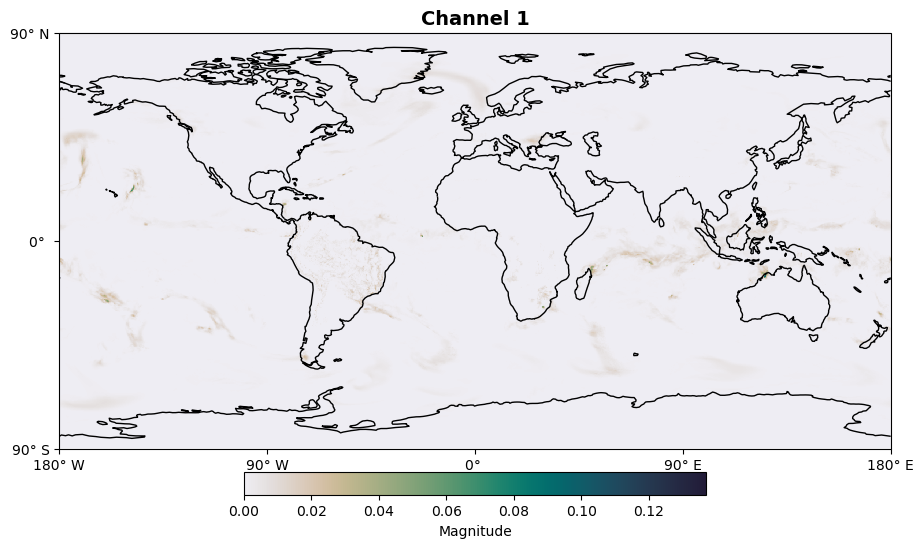

In [71]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as ocean

data = dataset[0]

data['input'].shape, data['output'].shape
# Remove the first dimension (batch dimension)
hr_data = data['output']  # Shape: (C, 721, 1440)

# Define coordinates
loncoords_hres = np.linspace(0, 360, 1440)
latcoords_hres = np.linspace(90, -90, 721)

# Set up the plotting parameters
projection = ccrs.PlateCarree()

# Determine the number of channels
num_channels = hr_data.shape[0]

# Handle single-channel and multi-channel cases
if num_channels == 1:
    fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})
    axs = [ax]  # Wrap in list for consistency
else:
    fig, axs = plt.subplots(2, (num_channels + 1) // 2, figsize=(20, 12), subplot_kw={'projection': projection})
    axs = axs.flatten()

# Latitude and Longitude tick marks
lat_ticks = np.arange(-90, 91, 90)  
lon_ticks = np.arange(-180, 181, 90)  

# Iterate through each channel and plot it
for i in range(num_channels):
    ax = axs[i]
    data = hr_data[i]
    im = ax.pcolormesh(
        loncoords_hres, latcoords_hres, data, vmin=data.min(), vmax=data.max(),
        transform=projection, cmap=ocean.cm.rain
    )
    ax.coastlines()
    ax.set_xticks(lon_ticks, crs=projection)
    ax.set_yticks(lat_ticks, crs=projection)

    # Define labels
    lat_labels = [f"{abs(lat)}° {'S' if lat < 0 else 'N' if lat > 0 else ''}" for lat in lat_ticks]
    lon_labels = [f"{abs(lon)}° {'W' if lon < 0 else 'E' if lon > 0 else ''}" for lon in lon_ticks]
    ax.set_xticklabels(lon_labels, fontsize=10)
    ax.set_yticklabels(lat_labels, fontsize=10)
    ax.set_title(f"Channel {i+1}", fontsize=14, fontweight="bold")

# Add a common colorbar
cbar = fig.colorbar(im, ax=axs, orientation="horizontal", fraction=0.05, pad=0.05)
cbar.set_label("Magnitude")

plt.show()

Calculate the stats for HR:

In [2]:
import glob
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm

# Define the variables to process for high-resolution data
output_vars = ["2m_temperature",
"u_component_of_wind_83",
"v_component_of_wind_83",
"geopotential_at_surface",
"specific_humidity_133",
"total_precipitation_6hr"]

# Collect files for the desired years
files = []
for year in range(2000, 2001):
    files.extend(glob.glob(f'/glade/derecho/scratch/mdarman/ERA5_hr_haiwen/data/{year}_*.h5'))

files = sorted(files)

print(f"Total files selected: {len(files)}")

# Dictionary to store global mean/std for each variable
results = {}

# Loop over each variable with tqdm for progress tracking
for var_name in tqdm(output_vars, desc="Processing Variables"):
    mean_over_files = []
    std_over_files = []
    valid_files = []
    valid_count = 0

    print(f"\nProcessing Variable: {var_name}")

    # Single pass: collect per-file mean and std (over entire 2D field)
    for file in tqdm(files, desc=f"Reading files for {var_name}", leave=False):
        with Dataset(file, "r") as f:
            if var_name in f['input'].variables:
                data = f['input'].variables[var_name][:]  # shape often (721, 1440)

                if not np.isnan(data).any():
                    file_mean = np.mean(data)
                    file_std = np.std(data)

                    mean_over_files.append(file_mean)
                    std_over_files.append(file_std)
                    
                    valid_files.append(file)
                    valid_count += 1
            else:
                print(f"Variable '{var_name}' not found in file {file}, skipping.")

    print(f"Valid files for {var_name}: {len(valid_files)}")

    # Convert lists to arrays for vectorized operations
    mean_over_files = np.array(mean_over_files)
    std_over_files = np.array(std_over_files)

    # Compute global mean/std using the law of total variance
    if valid_count > 0:
        # Global mean is the average of the per-file means
        global_mean = mean_over_files.mean()

        # Law of total variance:
        # Var(X) = E[Var(X|file)] + Var(E[X|file])
        #         = mean(file_std^2) + mean(file_mean^2) - (global_mean^2)
        global_variance = (std_over_files**2).mean() \
                          + (mean_over_files**2).mean() \
                          - (global_mean**2)
        global_std = np.sqrt(global_variance)
    else:
        # If no valid files, default to zero
        global_mean = 0.0
        global_std = 0.0

    # Store results
    results[var_name] = {
        "mean": global_mean,
        "std":  global_std
    }

    # Print results
    print(f"Variable: {var_name}")
    print("Mean:", global_mean)
    print("STD:",  global_std)

# Save results
np.savez('/glade/derecho/scratch/mdarman/lucie/dodool_hr.npz', **results)

# Verify saved file
loaded_data = np.load('/glade/derecho/scratch/mdarman/lucie/dodool_hr.npz', allow_pickle=True)
for var_name in loaded_data:
    stats = loaded_data[var_name].item()
    print(f"{var_name}: Mean = {stats['mean']}, STD = {stats['std']}")

Total files selected: 1464


Processing Variables:   0%|          | 0/6 [00:00<?, ?it/s]


Processing Variable: 2m_temperature


Processing Variables:  17%|█▋        | 1/6 [00:16<01:20, 16.04s/it]

Valid files for 2m_temperature: 1464
Variable: 2m_temperature
Mean: 278.28372
STD: 21.38811263813387

Processing Variable: u_component_of_wind_83


Processing Variables:  33%|███▎      | 2/6 [00:33<01:07, 16.78s/it]

Valid files for u_component_of_wind_83: 1464
Variable: u_component_of_wind_83
Mean: 11.677809
STD: 17.446938377499905

Processing Variable: v_component_of_wind_83


Processing Variables:  50%|█████     | 3/6 [00:49<00:49, 16.35s/it]

Valid files for v_component_of_wind_83: 1464
Variable: v_component_of_wind_83
Mean: -0.041310914
STD: 13.171597062985414

Processing Variable: geopotential_at_surface


Processing Variables:  67%|██████▋   | 4/6 [01:04<00:32, 16.07s/it]

Valid files for geopotential_at_surface: 1464
Variable: geopotential_at_surface
Mean: 3723.7732
STD: 8349.270698954379

Processing Variable: specific_humidity_133


Processing Variables:  83%|████████▎ | 5/6 [02:42<00:45, 45.59s/it]

Valid files for specific_humidity_133: 1464
Variable: specific_humidity_133
Mean: 0.006906163
STD: 0.0058310272538352435

Processing Variable: total_precipitation_6hr


Processing Variables: 100%|██████████| 6/6 [04:17<00:00, 42.92s/it]

Valid files for total_precipitation_6hr: 1464
Variable: total_precipitation_6hr
Mean: 0.00060071005
STD: 0.0019355635910497948
2m_temperature: Mean = 278.2837219238281, STD = 21.38811263813387
u_component_of_wind_83: Mean = 11.67780876159668, STD = 17.446938377499905
v_component_of_wind_83: Mean = -0.04131091386079788, STD = 13.171597062985414
geopotential_at_surface: Mean = 3723.773193359375, STD = 8349.270698954379
specific_humidity_133: Mean = 0.0069061629474163055, STD = 0.0058310272538352435
total_precipitation_6hr: Mean = 0.0006007100455462933, STD = 0.0019355635910497948


Checking Haiwen's stats

In [3]:
import numpy as np

# Define the path
path = "/glade/derecho/scratch/mdarman/ERA5_hr_haiwen/stats/"

# Load the saved numpy arrays
loaded_data = np.load(path + 'normalize_mean.npz', allow_pickle=True)
loaded_data_std = np.load(path + 'normalize_std.npz', allow_pickle=True)

# Print available keys in each .npz file
print("Keys in normalize_mean.npz:", loaded_data.files)
print("Keys in normalize_std.npz:", loaded_data_std.files)

# Define the expected variable names
var_names = [
    "2m_temperature",
    "u_component_of_wind_83",
    "v_component_of_wind_83",
    "geopotential_at_surface",
    "specific_humidity_133",
    "total_precipitation_6hr"
]

# Iterate through the expected variable names
for var in var_names:
    if var in loaded_data.files and var in loaded_data_std.files:  # Ensure key exists in both
        stats_mean = loaded_data[var].item()  # Extract dictionary stored in npz
        stats_std = loaded_data_std[var].item()
        print(f"{var}: Mean = {stats_mean}, STD = {stats_std}")
    else:
        print(f"Warning: {var} not found in one or both .npz files")

Keys in normalize_mean.npz: ['geopotential_at_surface', 'land_sea_mask', 'anisotropy_of_sub_gridscale_orography', 'angle_of_sub_gridscale_orography', 'high_vegetation_cover', 'lake_cover', 'lake_depth', 'low_vegetation_cover', 'slope_of_sub_gridscale_orography', 'soil_type', 'standard_deviation_of_filtered_subgrid_orography', 'standard_deviation_of_orography', 'type_of_high_vegetation', 'type_of_low_vegetation', '2m_dewpoint_temperature', '2m_temperature', '10m_u_component_of_wind', '10m_v_component_of_wind', 'mean_sea_level_pressure', 'sea_ice_cover', 'sea_surface_temperature', 'surface_pressure', 'toa_incident_solar_radiation_6hr', 'total_cloud_cover', 'total_precipitation_6hr', 'total_column_water_vapour', 'mean_surface_latent_heat_flux', 'mean_surface_net_long_wave_radiation_flux', 'mean_surface_net_short_wave_radiation_flux', 'mean_surface_sensible_heat_flux', 'mean_top_downward_short_wave_radiation_flux', 'mean_top_net_long_wave_radiation_flux', 'mean_top_net_short_wave_radiation

In [4]:
import numpy as np

# Define paths for the three input files
input_files = [
    "/glade/derecho/scratch/mdarman/lucie/01_stat.npz",
    "/glade/derecho/scratch/mdarman/lucie/02_stat.npz",
    "/glade/derecho/scratch/mdarman/lucie/03_stat.npz"
]

# Define output file
output_file = "/glade/derecho/scratch/mdarman/lucie/merged_stats.npz"

# Dictionary to store merged data
merged_data = {}

# Loop through the three input files
for file_path in input_files:
    loaded_data = np.load(file_path, allow_pickle=True)  # Load the npz file

    for var_name in loaded_data:  # Iterate through stored variables
        stats = loaded_data[var_name].item()  # Extract dictionary

        # Store the mean and std under the variable name
        merged_data[var_name] = {
            "mean": stats["mean"],
            "std": stats["std"]
        }

# Save the merged dictionary into a single .npz file
np.savez(output_file, **merged_data)

print(f"✅ Merged statistics saved successfully in: {output_file}")

loaded_data = np.load(f'/glade/derecho/scratch/mdarman/lucie/merged_stats.npz', allow_pickle=True)
for var_name in loaded_data:
    stats = loaded_data[var_name].item()
    print(f"{var_name}: Mean = {stats['mean']}, STD = {stats['std']}")

✅ Merged statistics saved successfully in: /glade/derecho/scratch/mdarman/lucie/merged_stats.npz


In [37]:
import glob
import os
import h5py
import torch
import numpy as np
from torch.utils.data import Dataset

class ClimateDataset_v2(Dataset):
    def __init__(self, input_dir_lr, input_dir_hr, input_vars, output_vars, lr_lats, lr_lons,
                 year_range=None, normalize=False, input_normalization_file=None, output_normalization_file=None):
        self.input_dir_lr = input_dir_lr
        self.input_dir_hr = input_dir_hr
        self.input_vars = input_vars
        self.output_vars = output_vars
        self.lr_lats = lr_lats
        self.lr_lons = lr_lons
        self.normalize = normalize
        self.year_range = year_range


        # Get all files in directories and sort them chronologically
        self.lr_files = sorted(glob.glob(os.path.join(self.input_dir_lr, "*.h5")))  # Hourly files
        self.hr_files = sorted(glob.glob(os.path.join(self.input_dir_hr, "*.h5")))  # 6-hourly files

        # Filter files based on the year range
        if self.year_range:
            start_year, end_year = self.year_range
            self.lr_files = [f for f in self.lr_files if start_year <= int(os.path.basename(f).split('_')[0]) <= end_year]
            self.hr_files = [f for f in self.hr_files if start_year <= int(os.path.basename(f).split('_')[0]) <= end_year]
            print("Length of lr_files: ", len(self.lr_files))
            print("Length of hr_files: ", len(self.hr_files))

        # Adjust LR files to every 6th file to align with HR files
        self.lr_files_six_hourly = self.lr_files[::6]

        # Use limited data for debugging
        self.hr_files = self.hr_files[:256]
        self.lr_files_six_hourly = self.lr_files_six_hourly[:256]
        
        assert len(self.hr_files) == len(self.lr_files_six_hourly), \
            "Mismatch between high-resolution and low-resolution timesteps."

        print(len(self.hr_files), len(self.lr_files_six_hourly))
        # Pre-filter files to remove those with NaN values
        valid_lr_files = []
        valid_hr_files = []
        for lr_file, hr_file in zip(self.lr_files_six_hourly, self.hr_files):
            try:
                # Load HR data and check for NaNs
                with h5py.File(hr_file, 'r') as f:
                    hr_data = {var: f['input'][var][:] for var in self.output_vars}
                    if any(np.isnan(hr_data[var]).any() for var in self.output_vars):
                        continue  # Skip this file if NaNs are present

                # Load LR data and check for NaNs
                with h5py.File(lr_file, 'r') as f:
                    lr_data = {var: np.flipud(f['input'][var][:]) for var in self.input_vars}
                    if any(np.isnan(lr_data[var]).any() for var in self.input_vars):
                        continue  # Skip this file if NaNs are present

                # If no NaNs are found, add to valid files list
                valid_lr_files.append(lr_file)
                valid_hr_files.append(hr_file)

            except Exception as e:
                print(f"Error reading files {lr_file} or {hr_file}: {e}")
        # Save valid files list
        
        self.lr_files_six_hourly = valid_lr_files
        self.hr_files = valid_hr_files

        print(f"Found {len(self.hr_files)} valid files.")
        print(f"Found {len(self.lr_files_six_hourly)} valid files.")
        # Load normalization parameters if normalization is enabled
        if self.normalize:
            # Load input normalization parameters
            if input_normalization_file:
                input_norm_data = np.load(input_normalization_file, allow_pickle=True)
                self.input_mean_std = {var: (input_norm_data[var].item()['mean'], input_norm_data[var].item()['std']) 
                                       for var in self.input_vars}
            else:
                raise ValueError("Input normalization file path is required when normalization is enabled.")

            # Load output normalization parameters
            if output_normalization_file:
                output_norm_data = np.load(output_normalization_file, allow_pickle=True)
                self.output_mean_std = {var: (output_norm_data[var].item()['mean'], output_norm_data[var].item()['std']) 
                                        for var in self.output_vars}
            else:
                raise ValueError("Output normalization file path is required when normalization is enabled.")

    def __len__(self):
        return len(self.hr_files)

    def __getitem__(self, idx):
        # Load HR data for the current timestep
        hr_file_path = self.hr_files[idx]
        with h5py.File(hr_file_path, 'r') as f:
            hr_data = {var: f['input'][var][:] for var in self.output_vars}

        # Normalize HR data if needed
        if self.normalize:
            hr_data = {var: (hr_data[var] - self.output_mean_std[var][0]) / self.output_mean_std[var][1]
                       for var in self.output_vars}

        # Load corresponding LR data (every 6th LR file matches each HR timestep)
        lr_file_path = self.lr_files_six_hourly[idx]
        with h5py.File(lr_file_path, 'r') as f:
            lr_data = {var: np.flipud(f['input'][var][:]) for var in self.input_vars}
        
        # Normalize LR data if needed
        if self.normalize:
            lr_data = {var: (lr_data[var] - self.input_mean_std[var][0]) / self.input_mean_std[var][1]
                       for var in self.input_vars}

        # Prepare the data to be returned as a dictionary
        data = {
            'input': torch.tensor(np.array([lr_data[var] for var in self.input_vars])),  # Input data tensor
            'output': torch.tensor(np.array([hr_data[var] for var in self.output_vars])),  # Output data tensor
            'input_vars': self.input_vars,  # List of input variable names
            'output_vars': self.output_vars,
            'lr_lats': self.lr_lats,  # Low-resolution latitudes
            'lr_lons': self.lr_lons,  # Low-resolution longitudes
        }

        # Include normalization statistics if normalization is enabled
        if self.normalize:
            data['input_stats'] = {var: {'mean': self.input_mean_std[var][0], 'std': self.input_mean_std[var][1]}
                                   for var in self.input_vars}
            data['output_stats'] = {var: {'mean': self.output_mean_std[var][0], 'std': self.output_mean_std[var][1]}
                                    for var in self.output_vars}

        return data



In [ ]:
input_vars = [
'Temperature_7',
'Specific_Humidity_7', 
'U-wind_3', 
'V-wind_3', 
'tp6hr', 
'orography',
'land_sea_mask', 
'logp', 
]
output_vars = [
"2m_temperature",
"specific_humidity_133",
"u_component_of_wind_83",
"v_component_of_wind_83",
"total_precipitation_6hr",
"geopotential_at_surface",
]
lr_lats = [87.159, 83.479, 79.777, 76.070, 72.362, 68.652, 64.942, 61.232, 
        57.521, 53.810, 50.099, 46.389, 42.678, 38.967, 35.256, 31.545, 
        27.833, 24.122, 20.411, 16.700, 12.989, 9.278, 5.567, 1.856, 
        -1.856, -5.567, -9.278, -12.989, -16.700, -20.411, -24.122, 
        -27.833, -31.545, -35.256, -38.967, -42.678, -46.389, -50.099, 
        -53.810, -57.521, -61.232, -64.942, -68.652, -72.362, -76.070, 
        -79.777, -83.479, -87.159]

lr_lons = [0.0, 3.75, 7.5, 11.25, 15.0, 18.75, 22.5, 26.25, 30.0, 33.75,
        37.5, 41.25, 45.0, 48.75, 52.5, 56.25, 60.0, 63.75, 67.5, 71.25,
        75.0, 78.75, 82.5, 86.25, 90.0, 93.75, 97.5, 101.25, 105.0, 108.75,
        112.5, 116.25, 120.0, 123.75, 127.5, 131.25, 135.0, 138.75, 142.5, 146.25,
        150.0, 153.75, 157.5, 161.25, 165.0, 168.75, 172.5, 176.25, 180.0, 183.75,
        187.5, 191.25, 195.0, 198.75, 202.5, 206.25, 210.0, 213.75, 217.5, 221.25,
        225.0, 228.75, 232.5, 236.25, 240.0, 243.75, 247.5, 251.25, 255.0, 258.75,
        262.5, 266.25, 270.0, 273.75, 277.5, 281.25, 285.0, 288.75, 292.5, 296.25,
        300.0, 303.75, 307.5, 311.25, 315.0, 318.75, 322.5, 326.25, 330.0, 333.75,
        337.5, 341.25, 345.0, 348.75, 352.5, 356.25]
dataset = Climatedataset22_v2(input_dir_lr='/glade/derecho/scratch/asheshc/ERA5_t30/train', 
                             input_dir_hr='/glade/derecho/scratch/mdarman/ERA5_hr_haiwen/data', 
                             input_vars=input_vars, 
                             output_vars=output_vars, 
                             lr_lats=lr_lats, 
                             lr_lons=lr_lons,
                             year_range=(2000, 2009),
                             normalize=True, 
                             input_normalization_file='/glade/derecho/scratch/mdarman/lucie/stats_lr_2000_2009_updated.npz', 
                             output_normalization_file="/glade/derecho/scratch/mdarman/lucie/stats_hr_2000_2009_updated.npz",
                             ) 

Loading valid files from /glade/derecho/scratch/mdarman/lucie/valid_files.npz...
Found 256 valid files.
Found 256 valid files.


In [11]:
# Load data from dataloader
batch_size = 2
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

for data in dataloader:
    input_data = data['input']
    output_data = data['output']

    print(f"Input shape: {input_data.shape}, Output shape: {output_data.shape}")
    break

Input shape: torch.Size([2, 8, 48, 96]), Output shape: torch.Size([2, 6, 721, 1440])


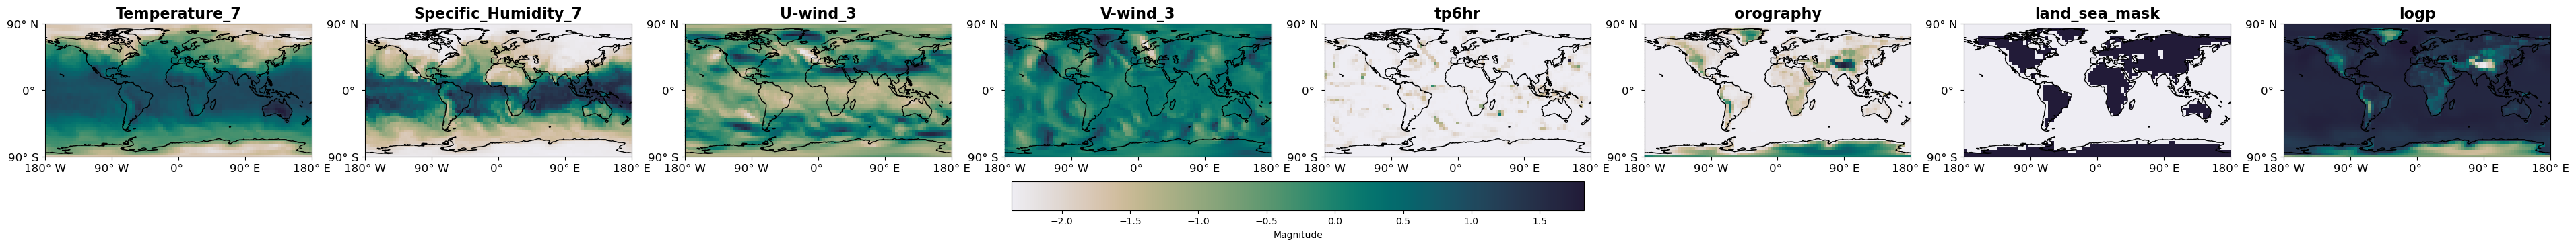

In [17]:
import os
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as ocean


    
# Load data for selected variables
# data_to_plot = [(hr_data[var][()], var) for var in output_vars]
data_to_plot = [(input_data[0, idx], input_vars[idx]) for idx in range(len(input_vars))]
# data_to_plot = [(output_data[0, idx], output_vars[idx]) for idx in range(len(output_vars))]

# Define coordinates
# loncoords_hres = np.linspace(0, 360, 1440)
# latcoords_hres = np.linspace(90, -90, 721)
loncoords_hres = np.linspace(0, 360, 96)
latcoords_hres = np.linspace(90, -90, 48)

# Set up the plotting parameters
projection = ccrs.PlateCarree()

# Create subplots
fig, axs = plt.subplots(1, len(data_to_plot), figsize=(6 * len(data_to_plot), 12), subplot_kw={'projection': projection})

if len(data_to_plot) == 1:
    axs = [axs]  # Ensure axs is iterable for a single subplot

# Latitude and Longitude tick marks
lat_ticks = np.arange(-90, 91, 90)  # Every 30 degrees from -90 to 90
lon_ticks = np.arange(-180, 181, 90)  # Every 60 degrees from -180 to 180
ims = []

for ax, (data, title) in zip(axs, data_to_plot):
    im = ax.pcolormesh(
        loncoords_hres, latcoords_hres, data, vmin=data.min(), vmax=data.max(),
        transform=projection, cmap=ocean.cm.rain
    )
    ax.coastlines()
    ax.set_xticks(lon_ticks, crs=projection)
    ax.set_yticks(lat_ticks, crs=projection)
    
    # Define latitude and longitude labels
    lat_labels = [f"{abs(lat)}° {'S' if lat < 0 else 'N' if lat > 0 else ''}" for lat in lat_ticks]
    lon_labels = [f"{abs(lon)}° {'W' if lon < 0 else 'E' if lon > 0 else ''}" for lon in lon_ticks]
    ax.set_xticklabels(lon_labels, fontsize=12)
    ax.set_yticklabels(lat_labels, fontsize=12)
    ax.set_title(f"{title}", fontsize=16, fontweight="bold")
    ims.append(im)

# Add a colorbar common to all subplots
cbar = fig.colorbar(ims[0], ax=axs, orientation="horizontal", fraction=0.046, pad=0.04)
cbar.set_label("Magnitude")

plt.show()


In [1]:
import glob
import os
import h5py
import torch
import numpy as np
from torch.utils.data import Dataset

class ClimateDataset_v2(Dataset):
    def __init__(self, input_dir_lr, input_dir_hr, input_vars, output_vars, lr_lats, lr_lons,
                 year_range=None, normalize=False, input_normalization_file=None, output_normalization_file=None,
                 cache_file="/glade/derecho/scratch/mdarman/lucie/valid_files.npz", force_recompute=False):
        self.input_dir_lr = input_dir_lr
        self.input_dir_hr = input_dir_hr
        self.input_vars = input_vars
        self.output_vars = output_vars
        self.lr_lats = lr_lats
        self.lr_lons = lr_lons
        self.normalize = normalize
        self.year_range = year_range
        self.cache_file = cache_file  # Cache file for storing valid files
        self.force_recompute = force_recompute  # If True, force recalculation of valid files

        # Get all files in directories and sort them chronologically
        self.lr_files = sorted(glob.glob(os.path.join(self.input_dir_lr, "*.h5")))  # Hourly files
        self.hr_files = sorted(glob.glob(os.path.join(self.input_dir_hr, "*.h5")))  # 6-hourly files

        # Filter files based on the year range
        if self.year_range:
            start_year, end_year = self.year_range
            self.lr_files = [f for f in self.lr_files if start_year <= int(os.path.basename(f).split('_')[0]) <= end_year]
            self.hr_files = [f for f in self.hr_files if start_year <= int(os.path.basename(f).split('_')[0]) <= end_year]

        # Adjust LR files to every 6th file to align with HR files
        self.lr_files_six_hourly = self.lr_files[::6]

        # Use limited data for debugging
        self.hr_files = self.hr_files[:256]
        self.lr_files_six_hourly = self.lr_files_six_hourly[:256]
        
        assert len(self.hr_files) == len(self.lr_files_six_hourly), \
            "Mismatch between high-resolution and low-resolution timesteps."

        # Load or compute valid file lists
        self.load_or_compute_valid_files()

        print(f"Found {len(self.hr_files)} valid files.")
        print(f"Found {len(self.lr_files_six_hourly)} valid files.")

        # Load normalization parameters if normalization is enabled
        if self.normalize:
            if input_normalization_file:
                input_norm_data = np.load(input_normalization_file, allow_pickle=True)
                self.input_mean_std = {var: (input_norm_data[var].item()['mean'], input_norm_data[var].item()['std']) 
                                       for var in self.input_vars}
            else:
                raise ValueError("Input normalization file path is required when normalization is enabled.")

            if output_normalization_file:
                output_norm_data = np.load(output_normalization_file, allow_pickle=True)
                self.output_mean_std = {var: (output_norm_data[var].item()['mean'], output_norm_data[var].item()['std']) 
                                        for var in self.output_vars}
            else:
                raise ValueError("Output normalization file path is required when normalization is enabled.")

    def load_or_compute_valid_files(self):
        """Loads valid file lists from cache or computes them if needed."""
        if os.path.exists(self.cache_file) and not self.force_recompute:
            print(f"Loading valid files from {self.cache_file}...")
            data = np.load(self.cache_file, allow_pickle=True)
            self.lr_files_six_hourly = list(data["valid_lr_files"])
            self.hr_files = list(data["valid_hr_files"])
        else:
            print("Computing valid files (this may take time)...")
            valid_lr_files = []
            valid_hr_files = []
            
            for lr_file, hr_file in zip(self.lr_files_six_hourly, self.hr_files):
                try:
                    # Check HR data for NaNs
                    with h5py.File(hr_file, 'r') as f:
                        hr_data = {var: f['input'][var][:] for var in self.output_vars}
                        if any(np.isnan(hr_data[var]).any() for var in self.output_vars):
                            continue  # Skip file if NaNs are present

                    # Check LR data for NaNs
                    with h5py.File(lr_file, 'r') as f:
                        lr_data = {var: np.flipud(f['input'][var][:]) for var in self.input_vars}
                        if any(np.isnan(lr_data[var]).any() for var in self.input_vars):
                            continue  # Skip file if NaNs are present

                    # Add valid files
                    valid_lr_files.append(lr_file)
                    valid_hr_files.append(hr_file)

                except Exception as e:
                    print(f"Error reading {lr_file} or {hr_file}: {e}")

            # Save valid files
            np.savez(self.cache_file, valid_lr_files=valid_lr_files, valid_hr_files=valid_hr_files)
            print(f"Valid file list saved to {self.cache_file}")

            # Update instance variables
            self.lr_files_six_hourly = valid_lr_files
            self.hr_files = valid_hr_files

    def __len__(self):
        return len(self.hr_files)

    def __getitem__(self, idx):
        """Load and return a single data sample"""
        hr_file_path = self.hr_files[idx]
        with h5py.File(hr_file_path, 'r') as f:
            hr_data = {var: f['input'][var][:] for var in self.output_vars}

        if self.normalize:
            hr_data = {var: (hr_data[var] - self.output_mean_std[var][0]) / self.output_mean_std[var][1]
                       for var in self.output_vars}

        lr_file_path = self.lr_files_six_hourly[idx]
        with h5py.File(lr_file_path, 'r') as f:
            lr_data = {var: np.flipud(f['input'][var][:]) for var in self.input_vars}

        if self.normalize:
            lr_data = {var: (lr_data[var] - self.input_mean_std[var][0]) / self.input_mean_std[var][1]
                       for var in self.input_vars}

        return {
            'input': torch.tensor(np.array([lr_data[var] for var in self.input_vars])),
            'output': torch.tensor(np.array([hr_data[var] for var in self.output_vars])),
            'input_vars': self.input_vars,
            'output_vars': self.output_vars,
            'lr_lats': self.lr_lats,
            'lr_lons': self.lr_lons
        }

KeyboardInterrupt: 

In [13]:
import numpy as np

# Range of indices to check
start_idx = 1
end_idx = 1000  # change this as needed

valid_indices = []

for idx in range(start_idx, end_idx):
    path = f"/glade/derecho/scratch/mdarman/lucie/results/unet_final_v0/samples_ddpm/{idx}.npz"
    
    try:
        data = np.load(path, allow_pickle=True)
        output = data['output']

        # Check for NaNs
        if not np.isnan(output).any():
            valid_indices.append(idx)

    except Exception as e:
        print(f"Skipped idx={idx} due to error: {e}")

print("Valid indices (no NaNs in output):", valid_indices)

Skipped idx=632 due to error: [Errno 2] No such file or directory: '/glade/derecho/scratch/mdarman/lucie/results/unet_final_v0/samples_ddpm/632.npz'
Skipped idx=633 due to error: [Errno 2] No such file or directory: '/glade/derecho/scratch/mdarman/lucie/results/unet_final_v0/samples_ddpm/633.npz'
Skipped idx=634 due to error: [Errno 2] No such file or directory: '/glade/derecho/scratch/mdarman/lucie/results/unet_final_v0/samples_ddpm/634.npz'
Skipped idx=635 due to error: [Errno 2] No such file or directory: '/glade/derecho/scratch/mdarman/lucie/results/unet_final_v0/samples_ddpm/635.npz'
Skipped idx=636 due to error: [Errno 2] No such file or directory: '/glade/derecho/scratch/mdarman/lucie/results/unet_final_v0/samples_ddpm/636.npz'
Skipped idx=637 due to error: [Errno 2] No such file or directory: '/glade/derecho/scratch/mdarman/lucie/results/unet_final_v0/samples_ddpm/637.npz'
Skipped idx=638 due to error: [Errno 2] No such file or directory: '/glade/derecho/scratch/mdarman/lucie/r

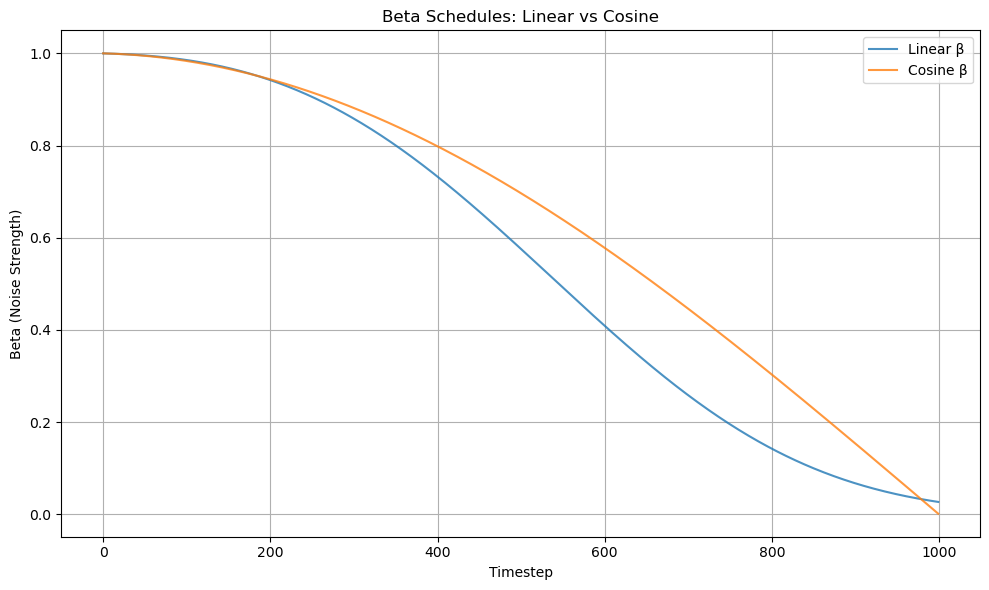

In [33]:
import torch
import numpy as np
import matplotlib.pyplot as plt


class LinearNoiseScheduler:
    def __init__(self, num_timesteps, beta_start, beta_end):
        self.num_timesteps = num_timesteps
        self.beta_start = beta_start
        self.beta_end = beta_end
        self.betas = (
            torch.linspace(beta_start ** 0.5, beta_end ** 0.5, num_timesteps) ** 2
        )
        self.alphas = 1. - self.betas
        self.alpha_cum_prod = torch.cumprod(self.alphas, dim=0)
        self.sqrt_alpha_cum_prod = torch.sqrt(self.alpha_cum_prod)
        self.sqrt_one_minus_alpha_cum_prod = torch.sqrt(1 - self.alpha_cum_prod)


class CosineNoiseScheduler:
    def __init__(self, num_timesteps, s=0.008):
        self.num_timesteps = num_timesteps
        self.s = s
        timesteps = torch.linspace(0, num_timesteps, num_timesteps + 1, dtype=torch.float64) / num_timesteps
        alpha_bar = torch.cos(((timesteps + s) / (1 + s)) * np.pi * 0.5) ** 2
        alpha_bar = alpha_bar / alpha_bar[0]
        self.alpha_cum_prod = alpha_bar[:-1]
        self.betas = 1 - (alpha_bar[1:] / alpha_bar[:-1])
        self.betas = torch.clamp(self.betas, max=0.999)
        self.alphas = 1. - self.betas
        self.sqrt_alpha_cum_prod = torch.sqrt(self.alpha_cum_prod)
        self.sqrt_one_minus_alpha_cum_prod = torch.sqrt(1 - self.alpha_cum_prod)


# Set common parameters
num_timesteps = 1000
beta_start = 0.0001
beta_end = 0.02

# Instantiate schedulers
linear_sched = LinearNoiseScheduler(num_timesteps, beta_start, beta_end)
cosine_sched = CosineNoiseScheduler(num_timesteps, 0.02)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(linear_sched.sqrt_alpha_cum_prod.numpy(), label="Linear β", alpha=0.8)
plt.plot(cosine_sched.sqrt_alpha_cum_prod.numpy(), label="Cosine β", alpha=0.8)
plt.title("Beta Schedules: Linear vs Cosine")
plt.xlabel("Timestep")
plt.ylabel("Beta (Noise Strength)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
import glob
import os
import h5py
import torch
import numpy as np
from torch.utils.data import Dataset

class ClimateDataset_v2(Dataset):
    def __init__(self, input_dir_lr, input_dir_hr, input_vars, output_vars, lr_lats, lr_lons,
                 year_range=None, normalize=False, input_normalization_file=None, output_normalization_file=None,
                 cache_file="/glade/derecho/scratch/mdarman/lucie/valid_files.npz", force_recompute=False):
        self.input_dir_lr = input_dir_lr
        self.input_dir_hr = input_dir_hr
        self.input_vars = input_vars
        self.output_vars = output_vars
        self.lr_lats = lr_lats
        self.lr_lons = lr_lons
        self.normalize = normalize
        self.year_range = year_range
        self.cache_file = cache_file  # Cache file for storing valid files
        self.force_recompute = force_recompute  # If True, force recalculation of valid files

        # Get all files in directories and sort them chronologically
        self.lr_files = sorted(glob.glob(os.path.join(self.input_dir_lr, "*.h5")))  # Hourly files
        self.hr_files = sorted(glob.glob(os.path.join(self.input_dir_hr, "*.h5")))  # 6-hourly files

        # Filter files based on the year range
        if self.year_range:
            start_year, end_year = self.year_range
            self.lr_files = [f for f in self.lr_files if start_year <= int(os.path.basename(f).split('_')[0]) <= end_year]
            self.hr_files = [f for f in self.hr_files if start_year <= int(os.path.basename(f).split('_')[0]) <= end_year]

        # Adjust LR files to every 6th file to align with HR files
        self.lr_files_six_hourly = self.lr_files[::6]
        
        assert len(self.hr_files) == len(self.lr_files_six_hourly), \
            "Mismatch between high-resolution and low-resolution timesteps."

        # Load or compute valid file lists
        self.load_or_compute_valid_files()

        print(f"Found {len(self.hr_files)} valid files.")
        print(f"Found {len(self.lr_files_six_hourly)} valid files.")

        # Load normalization parameters if normalization is enabled
        if self.normalize:
            if input_normalization_file:
                input_norm_data = np.load(input_normalization_file, allow_pickle=True)
                self.input_mean_std = {var: (input_norm_data[var].item()['mean'], input_norm_data[var].item()['std']) 
                                       for var in self.input_vars}
            else:
                raise ValueError("Input normalization file path is required when normalization is enabled.")

            if output_normalization_file:
                output_norm_data = np.load(output_normalization_file, allow_pickle=True)
                self.output_mean_std = {var: (output_norm_data[var].item()['mean'], output_norm_data[var].item()['std']) 
                                        for var in self.output_vars}
            else:
                raise ValueError("Output normalization file path is required when normalization is enabled.")

    def load_or_compute_valid_files(self):
        """Loads valid file lists from cache or computes them if needed."""
        if os.path.exists(self.cache_file) and not self.force_recompute:
            print(f"Loading valid files from {self.cache_file}...")
            data = np.load(self.cache_file, allow_pickle=True)
            self.lr_files_six_hourly = list(data["valid_lr_files"])
            self.hr_files = list(data["valid_hr_files"])
        else:
            print("Computing valid files (this may take time)...")
            valid_lr_files = []
            valid_hr_files = []
            
            for lr_file, hr_file in zip(self.lr_files_six_hourly, self.hr_files):
                try:
                    # Check HR data for NaNs
                    with h5py.File(hr_file, 'r') as f:
                        hr_data = {var: f['input'][var][:] for var in self.output_vars}
                        if any(np.isnan(hr_data[var]).any() for var in self.output_vars):
                            continue  # Skip file if NaNs are present

                    # Check LR data for NaNs
                    with h5py.File(lr_file, 'r') as f:
                        lr_data = {var: np.flipud(f['input'][var][:]) for var in self.input_vars}
                        if any(np.isnan(lr_data[var]).any() for var in self.input_vars):
                            continue  # Skip file if NaNs are present

                    # Add valid files
                    valid_lr_files.append(lr_file)
                    valid_hr_files.append(hr_file)

                except Exception as e:
                    print(f"Error reading {lr_file} or {hr_file}: {e}")

            # Save valid files
            np.savez(self.cache_file, valid_lr_files=valid_lr_files, valid_hr_files=valid_hr_files)
            print(f"Valid file list saved to {self.cache_file}")

            # Update instance variables
            self.lr_files_six_hourly = valid_lr_files
            self.hr_files = valid_hr_files

        # Use limited data for debugging
        # self.hr_files = self.hr_files[:256]
        # self.lr_files_six_hourly = self.lr_files_six_hourly[:256]

    def __len__(self):
        return len(self.hr_files)

    def __getitem__(self, idx):
        """Load and return a single data sample"""
        hr_file_path = self.hr_files[idx]
        with h5py.File(hr_file_path, 'r') as f:
            hr_data = {var: f['input'][var][:] for var in self.output_vars}

        if self.normalize:
            hr_data = {var: (hr_data[var] - self.output_mean_std[var][0]) / self.output_mean_std[var][1]
                       for var in self.output_vars}

        lr_file_path = self.lr_files_six_hourly[idx]
        with h5py.File(lr_file_path, 'r') as f:
            lr_data = {var: np.flipud(f['input'][var][:]) for var in self.input_vars}

        if self.normalize:
            lr_data = {var: (lr_data[var] - self.input_mean_std[var][0]) / self.input_mean_std[var][1]
                       for var in self.input_vars}

        return {
            'input': torch.tensor(np.array([lr_data[var] for var in self.input_vars])),
            'output': torch.tensor(np.array([hr_data[var] for var in self.output_vars])),
            'input_vars': self.input_vars,
            'output_vars': self.output_vars,
            'lr_lats': self.lr_lats,
            'lr_lons': self.lr_lons
        }


In [37]:
input_vars = [
'Temperature_7',
'Specific_Humidity_7', 
'U-wind_3', 
'V-wind_3', 
'tp6hr', 
'orography',
'land_sea_mask', 
'logp', 
]
output_vars = [
"2m_temperature",
"specific_humidity_133",
"u_component_of_wind_83",
"v_component_of_wind_83",
"total_precipitation_6hr",
"geopotential_at_surface",
]
lr_lats = [87.159, 83.479, 79.777, 76.070, 72.362, 68.652, 64.942, 61.232, 
        57.521, 53.810, 50.099, 46.389, 42.678, 38.967, 35.256, 31.545, 
        27.833, 24.122, 20.411, 16.700, 12.989, 9.278, 5.567, 1.856, 
        -1.856, -5.567, -9.278, -12.989, -16.700, -20.411, -24.122, 
        -27.833, -31.545, -35.256, -38.967, -42.678, -46.389, -50.099, 
        -53.810, -57.521, -61.232, -64.942, -68.652, -72.362, -76.070, 
        -79.777, -83.479, -87.159]

lr_lons = [0.0, 3.75, 7.5, 11.25, 15.0, 18.75, 22.5, 26.25, 30.0, 33.75,
        37.5, 41.25, 45.0, 48.75, 52.5, 56.25, 60.0, 63.75, 67.5, 71.25,
        75.0, 78.75, 82.5, 86.25, 90.0, 93.75, 97.5, 101.25, 105.0, 108.75,
        112.5, 116.25, 120.0, 123.75, 127.5, 131.25, 135.0, 138.75, 142.5, 146.25,
        150.0, 153.75, 157.5, 161.25, 165.0, 168.75, 172.5, 176.25, 180.0, 183.75,
        187.5, 191.25, 195.0, 198.75, 202.5, 206.25, 210.0, 213.75, 217.5, 221.25,
        225.0, 228.75, 232.5, 236.25, 240.0, 243.75, 247.5, 251.25, 255.0, 258.75,
        262.5, 266.25, 270.0, 273.75, 277.5, 281.25, 285.0, 288.75, 292.5, 296.25,
        300.0, 303.75, 307.5, 311.25, 315.0, 318.75, 322.5, 326.25, 330.0, 333.75,
        337.5, 341.25, 345.0, 348.75, 352.5, 356.25]

dataset = ClimateDataset_v2(
                            input_dir_lr='/glade/derecho/scratch/asheshc/ERA5_t30/train', 
                            input_dir_hr='/glade/derecho/scratch/mdarman/ERA5_hr_haiwen/data', 
                            input_vars=input_vars, 
                            output_vars=output_vars, 
                            lr_lats=lr_lats, 
                            lr_lons=lr_lons,
                            year_range=(2000, 2009),
                            normalize=True, 
                            input_normalization_file='/glade/derecho/scratch/mdarman/lucie/stats_lr_2000_2009_updated.npz', 
                            output_normalization_file='/glade/derecho/scratch/mdarman/lucie/stats_hr_2000_2009_updated.npz',
                            cache_file='/glade/derecho/scratch/mdarman/lucie/valid_files.npz',
                            force_recompute=False
                            )

Loading valid files from /glade/derecho/scratch/mdarman/lucie/valid_files.npz...
Found 14611 valid files.
Found 14611 valid files.


In [39]:
idx = 10
print(dataset[idx]['input'].mean(axis=(1,2)))
print(dataset[idx]['input'].std(axis=(1,2)))

print(dataset[idx]['output'].mean(axis=(1,2)))
print(dataset[idx]['output'].std(axis=(1,2)))




tensor([ 2.7609e+02,  6.2057e-03,  1.1260e+01,  7.7916e-02,  5.7344e-04,
         3.6718e+02,  2.6997e-01, -3.8862e-02])
tensor([1.6804e+01, 5.4326e-03, 1.6172e+01, 1.1108e+01, 1.7613e-03, 8.0938e+02,
        4.4399e-01, 1.1133e-01])
tensor([2.7735e+02, 6.4508e-03, 1.2447e+01, 2.3611e-01, 5.5744e-04, 3.7238e+03])
tensor([1.9929e+01, 5.7110e-03, 1.8019e+01, 1.2417e+01, 1.9111e-03, 8.3493e+03])


In [8]:
import glob
import os
import h5py
import torch
import numpy as np
from torch.utils.data import Dataset

class ClimateDataset(Dataset):
    def __init__(self, input_dir_lr, input_dir_hr, input_vars, output_vars, lr_lats, lr_lons,
                 year_range=None, normalize=False, input_normalization_file=None, output_normalization_file=None):
        self.input_dir_lr = input_dir_lr
        self.input_dir_hr = input_dir_hr
        self.input_vars = input_vars
        self.output_vars = output_vars
        self.lr_lats = lr_lats
        self.lr_lons = lr_lons
        self.normalize = normalize
        self.year_range = year_range


        # Get all files in directories and sort them chronologically
        self.lr_files = sorted(glob.glob(os.path.join(self.input_dir_lr, "*.h5")))  # Hourly files
        self.hr_files = sorted(glob.glob(os.path.join(self.input_dir_hr, "*.h5")))  # 6-hourly files

        # Filter files based on the year range
        if self.year_range:
            start_year, end_year = self.year_range
            self.lr_files = [f for f in self.lr_files if start_year <= int(os.path.basename(f).split('_')[0]) <= end_year]
            self.hr_files = [f for f in self.hr_files if start_year <= int(os.path.basename(f).split('_')[0]) <= end_year]
            print("Length of lr_files: ", len(self.lr_files))
            print("Length of hr_files: ", len(self.hr_files))

        # Adjust LR files to every 6th file to align with HR files
        self.lr_files_six_hourly = self.lr_files[::6]

        # Use limited data for debugging
        self.hr_files = self.hr_files[:256]
        self.lr_files_six_hourly = self.lr_files_six_hourly[:256]
        
        assert len(self.hr_files) == len(self.lr_files_six_hourly), \
            "Mismatch between high-resolution and low-resolution timesteps."

        print(len(self.hr_files), len(self.lr_files_six_hourly))
        # Pre-filter files to remove those with NaN values
        valid_lr_files = []
        valid_hr_files = []
        for lr_file, hr_file in zip(self.lr_files_six_hourly, self.hr_files):
            try:
                # Load HR data and check for NaNs
                with h5py.File(hr_file, 'r') as f:
                    hr_data = {var: f[var][:] for var in self.output_vars}
                    if any(np.isnan(hr_data[var]).any() for var in self.output_vars):
                        continue  # Skip this file if NaNs are present

                # Load LR data and check for NaNs
                with h5py.File(lr_file, 'r') as f:
                    lr_data = {var: np.flipud(f['input'][var][:]) for var in self.input_vars}
                    if any(np.isnan(lr_data[var]).any() for var in self.input_vars):
                        continue  # Skip this file if NaNs are present

                # If no NaNs are found, add to valid files list
                valid_lr_files.append(lr_file)
                valid_hr_files.append(hr_file)

            except Exception as e:
                print(f"Error reading files {lr_file} or {hr_file}: {e}")
        
        self.lr_files_six_hourly = valid_lr_files
        self.hr_files = valid_hr_files

        print(f"Found {len(self.hr_files)} valid files.")
        print(f"Found {len(self.lr_files_six_hourly)} valid files.")
        # Load normalization parameters if normalization is enabled
        if self.normalize:
            # Load input normalization parameters
            if input_normalization_file:
                input_norm_data = np.load(input_normalization_file, allow_pickle=True)
                self.input_mean_std = {var: (input_norm_data[var].item()['mean'], input_norm_data[var].item()['std']) 
                                       for var in self.input_vars}
            else:
                raise ValueError("Input normalization file path is required when normalization is enabled.")

            # Load output normalization parameters
            if output_normalization_file:
                output_norm_data = np.load(output_normalization_file, allow_pickle=True)
                self.output_mean_std = {var: (output_norm_data[var].item()['mean'], output_norm_data[var].item()['std']) 
                                        for var in self.output_vars}
            else:
                raise ValueError("Output normalization file path is required when normalization is enabled.")

    def __len__(self):
        return len(self.hr_files)

    def __getitem__(self, idx):
        # Load HR data for the current timestep
        hr_file_path = self.hr_files[idx]
        with h5py.File(hr_file_path, 'r') as f:
            hr_data = {var: f[var][:] for var in self.output_vars}
            hr_lats = f['Latitude'][:]
            hr_lons = f['Longitude'][:]

        # if "tp6hr" in hr_data:
        #     # print(((hr_data["tp6hr"] + 1e-8)<0).any(), hr_data["tp6hr"].min())
        #     # hr_data["tp6hr"] = np.log(hr_data["tp6hr"] + 1e-3)  # Adding a small constant to avoid log(0)
        #     pass
        # Normalize HR data if needed
        if self.normalize:
            hr_data = {var: (hr_data[var] - self.output_mean_std[var][0]) / self.output_mean_std[var][1]
                       for var in self.output_vars}

        # Load corresponding LR data (every 6th LR file matches each HR timestep)
        lr_file_path = self.lr_files_six_hourly[idx]
        with h5py.File(lr_file_path, 'r') as f:
            lr_data = {var: np.flipud(f['input'][var][:]) for var in self.input_vars}

        # if 'orography' in lr_data:
        #     lr_data['orography'] = (lr_data['orography'] - lr_data['orography'].mean())/lr_data['orography'].std()
        # if "tp6hr" in lr_data:
        #     # print(((lr_data["tp6hr"] + 1e-8)<0).any(), lr_data["tp6hr"].min())
        #     # lr_data["tp6hr"] = np.log(lr_data["tp6hr"] + 1e-3)  # Adding a small constant to avoid log(0)
        #     pass
        
        # Normalize LR data if needed
        if self.normalize:
            lr_data = {var: (lr_data[var] - self.input_mean_std[var][0]) / self.input_mean_std[var][1]
                       for var in self.input_vars}

        # Prepare the data to be returned as a dictionary
        data = {
            'input': torch.tensor(np.array([lr_data[var] for var in self.input_vars])),  # Input data tensor
            'output': torch.tensor(np.array([hr_data[var] for var in self.output_vars])),  # Output data tensor
            'input_vars': self.input_vars,  # List of input variable names
            'output_vars': self.output_vars,
            'lr_lats': self.lr_lats,  # Low-resolution latitudes
            'lr_lons': self.lr_lons,  # Low-resolution longitudes
            'hr_lats': hr_lats,  # High-resolution latitudes
            'hr_lons': hr_lons,  # High-resolution longitudes
        }

        # Include normalization statistics if normalization is enabled
        if self.normalize:
            data['input_stats'] = {var: {'mean': self.input_mean_std[var][0], 'std': self.input_mean_std[var][1]}
                                   for var in self.input_vars}
            data['output_stats'] = {var: {'mean': self.output_mean_std[var][0], 'std': self.output_mean_std[var][1]}
                                    for var in self.output_vars}

        return data



In [14]:
input_vars = ['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr', 'land_sea_mask', 'orography']
output_vars = ['2m_temperature', 'tp6hr']
lr_lats = [87.159, 83.479, 79.777, 76.070, 72.362, 68.652, 64.942, 61.232, 
        57.521, 53.810, 50.099, 46.389, 42.678, 38.967, 35.256, 31.545, 
        27.833, 24.122, 20.411, 16.700, 12.989, 9.278, 5.567, 1.856, 
        -1.856, -5.567, -9.278, -12.989, -16.700, -20.411, -24.122, 
        -27.833, -31.545, -35.256, -38.967, -42.678, -46.389, -50.099, 
        -53.810, -57.521, -61.232, -64.942, -68.652, -72.362, -76.070, 
        -79.777, -83.479, -87.159]

lr_lons = [0.0, 3.75, 7.5, 11.25, 15.0, 18.75, 22.5, 26.25, 30.0, 33.75,
        37.5, 41.25, 45.0, 48.75, 52.5, 56.25, 60.0, 63.75, 67.5, 71.25,
        75.0, 78.75, 82.5, 86.25, 90.0, 93.75, 97.5, 101.25, 105.0, 108.75,
        112.5, 116.25, 120.0, 123.75, 127.5, 131.25, 135.0, 138.75, 142.5, 146.25,
        150.0, 153.75, 157.5, 161.25, 165.0, 168.75, 172.5, 176.25, 180.0, 183.75,
        187.5, 191.25, 195.0, 198.75, 202.5, 206.25, 210.0, 213.75, 217.5, 221.25,
        225.0, 228.75, 232.5, 236.25, 240.0, 243.75, 247.5, 251.25, 255.0, 258.75,
        262.5, 266.25, 270.0, 273.75, 277.5, 281.25, 285.0, 288.75, 292.5, 296.25,
        300.0, 303.75, 307.5, 311.25, 315.0, 318.75, 322.5, 326.25, 330.0, 333.75,
        337.5, 341.25, 345.0, 348.75, 352.5, 356.25]
dataset2 = ClimateDataset(input_dir_lr='/glade/derecho/scratch/asheshc/ERA5_t30/train', 
                            input_dir_hr='/glade/derecho/scratch/asheshc/ERA5_hr',
                            input_vars=input_vars, 
                            output_vars=output_vars, 
                            lr_lats=lr_lats, 
                            lr_lons=lr_lons,
                            year_range=(2000, 2009),
                            normalize=True, 
                            input_normalization_file='/glade/derecho/scratch/mdarman/lucie/stats_lr_2000_2009_updated.npz', 
                            output_normalization_file='/glade/derecho/scratch/mdarman/lucie/stats_hr_2000_2009.npz'
                            )

Length of lr_files:  87672
Length of hr_files:  14612
256 256
Found 256 valid files.
Found 256 valid files.


In [10]:
input_vars = [
'Temperature_7',
'Specific_Humidity_7', 
'U-wind_3', 
'V-wind_3', 
'tp6hr', 
'orography',
'land_sea_mask', 
'logp', 
]
output_vars = [
"2m_temperature",
"specific_humidity_133",
"u_component_of_wind_83",
"v_component_of_wind_83",
"total_precipitation_6hr",
"geopotential_at_surface",
]

input_vars = ['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr', 'land_sea_mask', 'orography']
output_vars = ['2m_temperature', 'tp6hr']


In [15]:
idx = 220
print(dataset[idx]['input'].mean(axis=(1,2)))
print(dataset[idx]['input'].std(axis=(1,2)))

print(dataset[idx]['output'].mean(axis=(1,2)))
print(dataset[idx]['output'].std(axis=(1,2)))


print(dataset2[idx]['input'].mean(axis=(1,2)))
print(dataset2[idx]['input'].std(axis=(1,2)))

print(dataset2[idx]['output'].mean(axis=(1,2)))
print(dataset2[idx]['output'].std(axis=(1,2)))




tensor([-1.0771e-01, -5.6838e-02, -3.1617e-02,  2.9354e-03,  8.8859e-03,
         2.4835e-09,  5.3810e-09,  2.5215e-03])
tensor([1.0109, 1.0273, 1.1504, 0.9983, 0.9376, 1.0001, 1.0001, 1.0126])
tensor([-1.2506e-01, -6.4835e-02, -3.3733e-02,  9.0161e-03, -7.0480e-03,
        -7.8069e-08])
tensor([1.0276, 1.0262, 1.1356, 0.9945, 0.9098, 1.0000])
tensor([-1.0771e-01, -5.6838e-02, -3.1617e-02,  2.9354e-03,  2.5215e-03,
         8.8859e-03,  5.3810e-09,  2.4835e-09])
tensor([1.0109, 1.0273, 1.1504, 0.9983, 1.0126, 0.9376, 1.0001, 1.0001])
tensor([-0.1251, -0.0070])
tensor([1.0276, 0.9098])


In [18]:
print(dataset[idx]['input'].mean(axis=(1,2)))
print(dataset2[idx]['input'].mean(axis=(1,2)))



tensor([-1.0771e-01, -5.6838e-02, -3.1617e-02,  2.9354e-03,  8.8859e-03,
         2.4835e-09,  5.3810e-09,  2.5215e-03])
tensor([-1.0771e-01, -5.6838e-02, -3.1617e-02,  2.9354e-03,  2.5215e-03,
         8.8859e-03,  5.3810e-09,  2.4835e-09])


/glade/derecho/scratch/mdarman/tmp/ipykernel_50417/3238489595.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', 256)


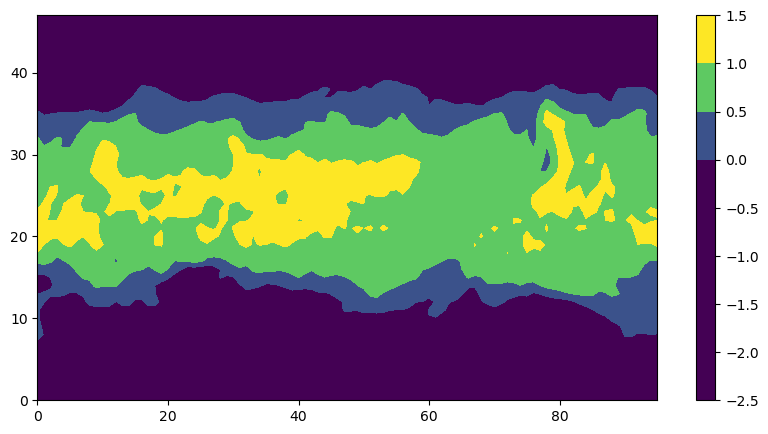

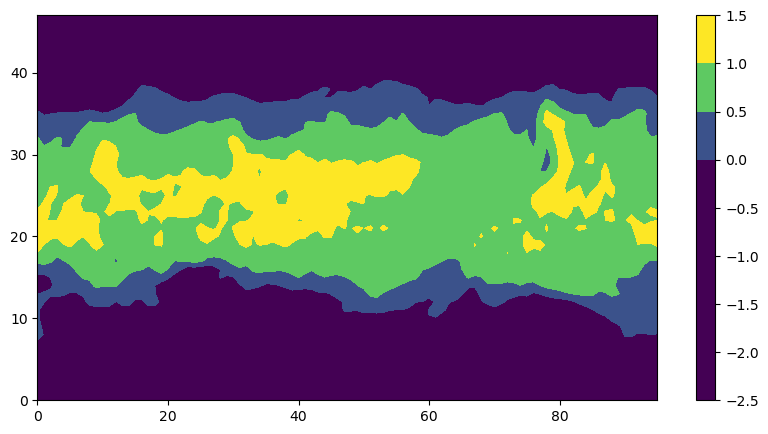

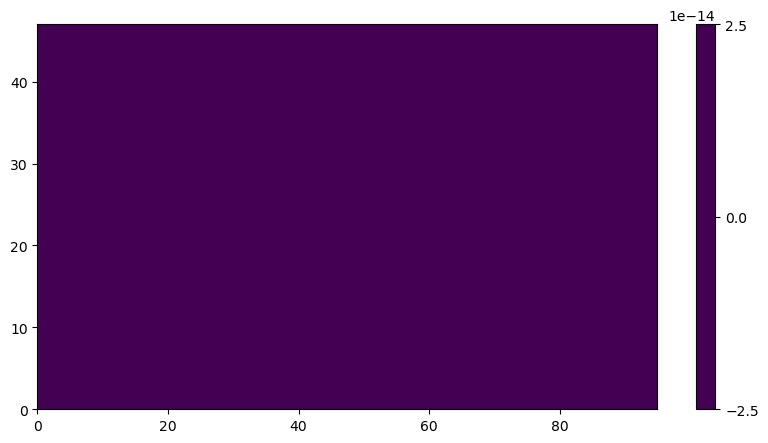

tensor(0.)


In [60]:
# Contour plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import matplotlib.colors as colors
import numpy as np

fig, ax = plt.subplots(figsize=(10, 5))
# Create a custom colormap
cmap = cm.get_cmap('viridis', 256)
norm = colors.Normalize(vmin=0, vmax=1)

# Plot the data
c = ax.contourf(dataset[0]['input'][0, :, :], 
                 cmap=cmap, norm=norm)

plt.colorbar(c, ax=ax)
fig, ax = plt.subplots(figsize=(10, 5))
c1= ax.contourf(dataset2[0]['input'][0, :, :], 
                 cmap=cmap, norm=norm)
plt.colorbar(c1, ax=ax)
plt.show()

# Plot the differnece
fig, ax = plt.subplots(figsize=(10, 5))
diff = dataset[0]['input'][0, :, :] - dataset2[0]['input'][0, :, :]
c2 = ax.contourf(diff, 
                 cmap=cmap, norm=norm)
plt.colorbar(c2, ax=ax)
plt.show()


print(diff.mean())


In [ ]:
import numpy as np
import torch

# --- Inputs ---
lucie_file_path = "/glade/derecho/scratch/mdarman/lucie/LUCIE_inference_start2010.npz"
input_normalization_file = '/glade/derecho/scratch/mdarman/lucie/stats_lr_2000_2009_updated.npz'
lucie_vars = ['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr']

input_vars = lucie_vars[:6]  # Only normalize first 6 variables
idx = 0  # Index of sample to extract
normalize = True

# --- Load normalization parameters ---
input_mean_std = {}
if normalize and input_normalization_file:
    input_norm_data = np.load(input_normalization_file, allow_pickle=True)
    input_mean_std = {
        var: (
            input_norm_data[var].item()['mean'],
            input_norm_data[var].item()['std']
        ) for var in input_vars
    }

# --- Load and preprocess Lucie data ---
lucie_tensor = None
lucie_data = None

if lucie_file_path and lucie_vars:
    data = np.load(lucie_file_path)
    lucie_data = data['data'][:, :, :, :len(lucie_vars)]

    # Apply log transform only to the inverse pressure (assumed second-to-last variable)
    lucie_data[..., -2] = np.log(lucie_data[..., -2] * 1e-5)

    # Normalize if requested
    if normalize:
        for i, var in enumerate(input_vars):
            mean, std = input_mean_std[var]
            lucie_data[:, :, :, i] = (lucie_data[:, :, :, i] - mean) / std

    # Extract and process single sample
    sample = lucie_data[idx]
    lucie_tensor = torch.tensor(sample, dtype=torch.float32).permute(2, 0, 1)  # (C, H, W)
    lucie_tensor = lucie_tensor.flip(1)  # flip vertically


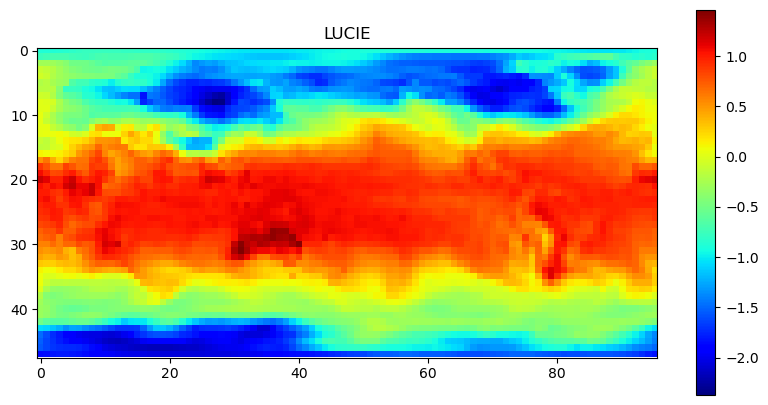

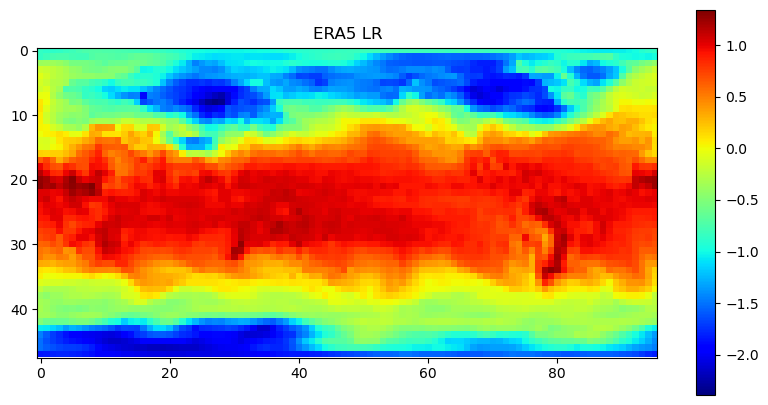

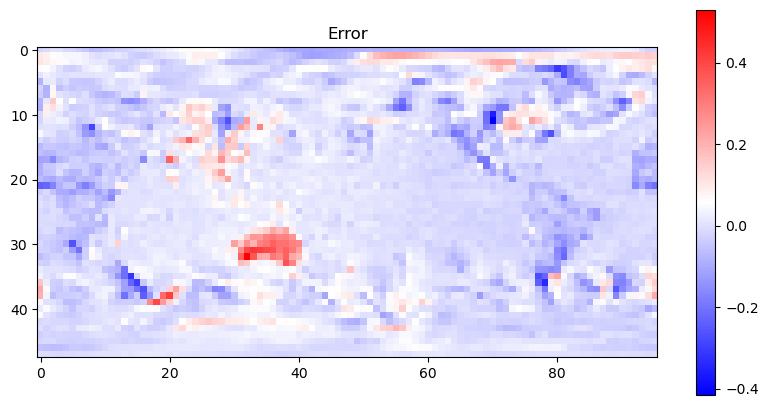

LUCIE:  tensor(-0.0742) tensor(0.9357)
ERA5 LR:  -0.073200755 0.93843454


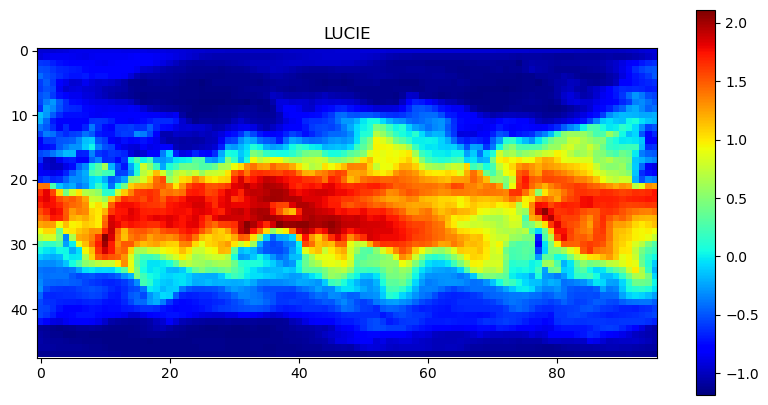

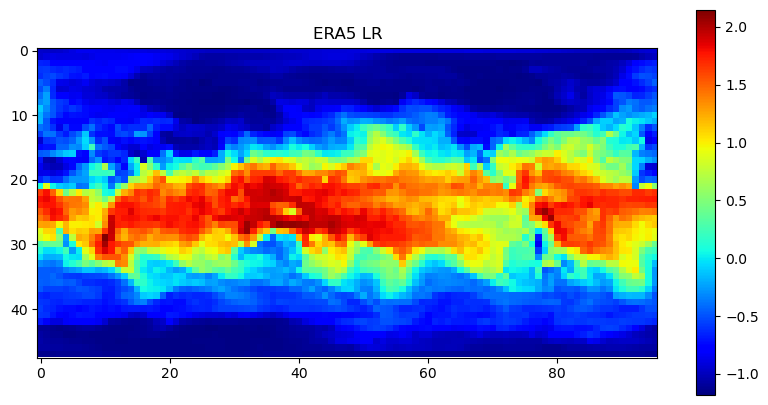

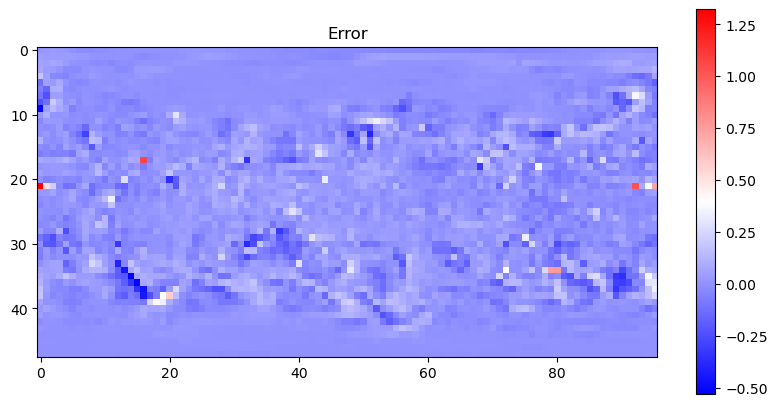

LUCIE:  tensor(-0.0666) tensor(0.9978)
ERA5 LR:  -0.069382206 0.99548125


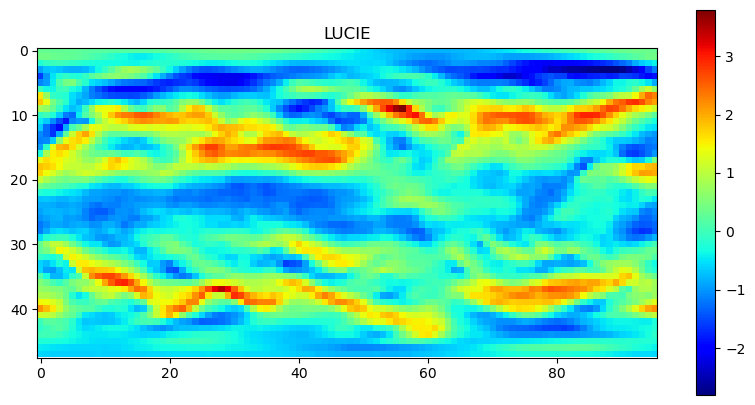

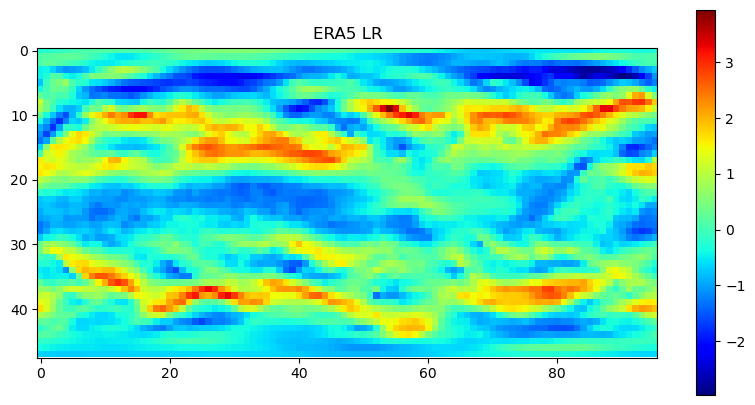

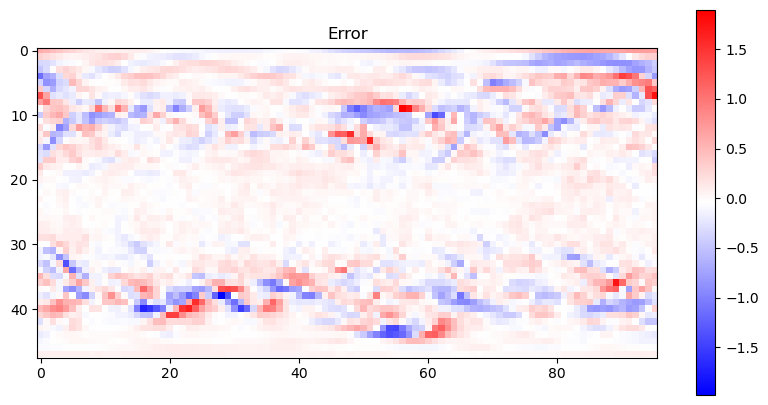

LUCIE:  tensor(0.0314) tensor(1.0122)
ERA5 LR:  0.031480893 1.0210687


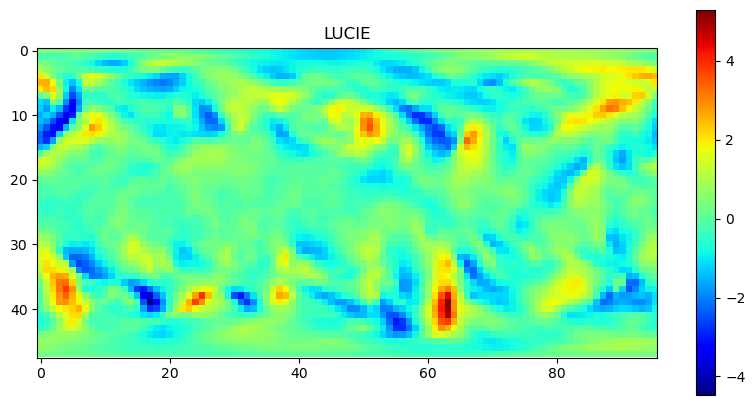

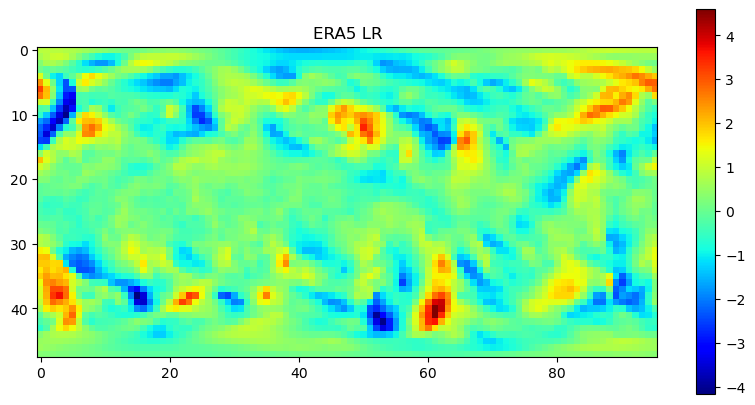

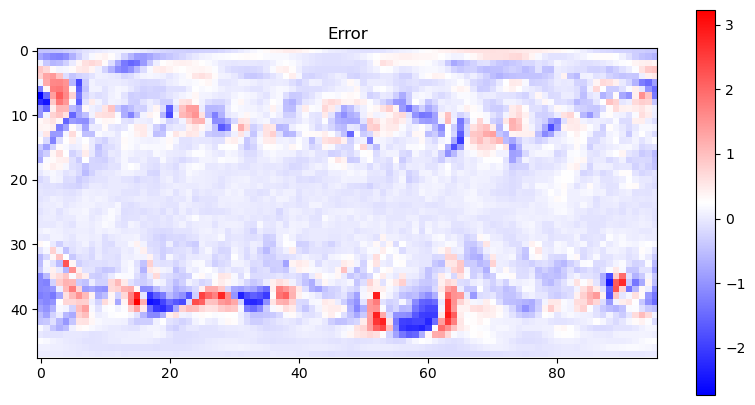

LUCIE:  tensor(0.0050) tensor(0.9215)
ERA5 LR:  0.0036192355 0.91739494


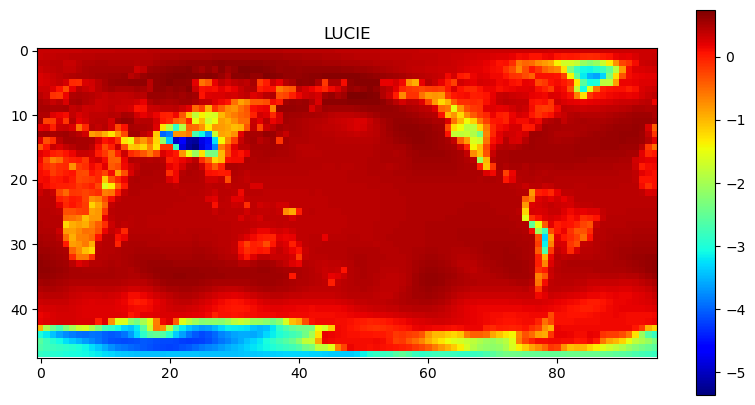

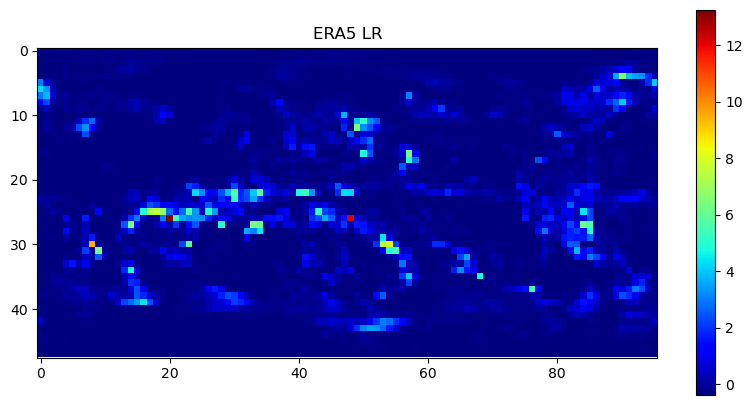

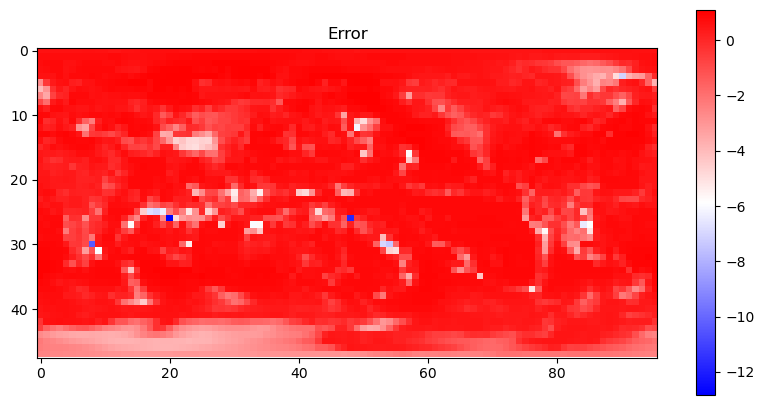

LUCIE:  tensor(-0.0054) tensor(0.9993)
ERA5 LR:  -0.03434538 0.87130225


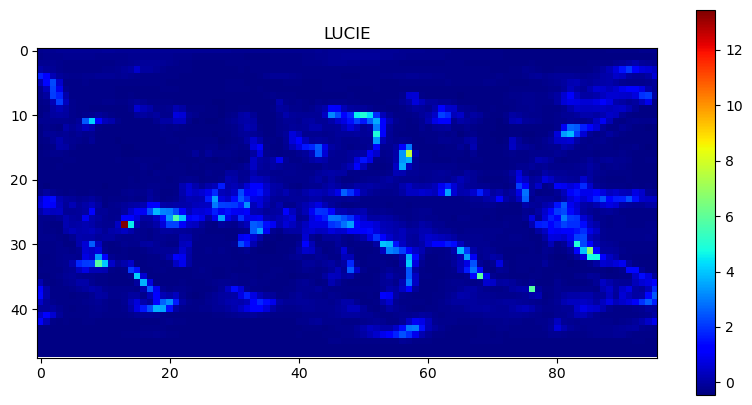

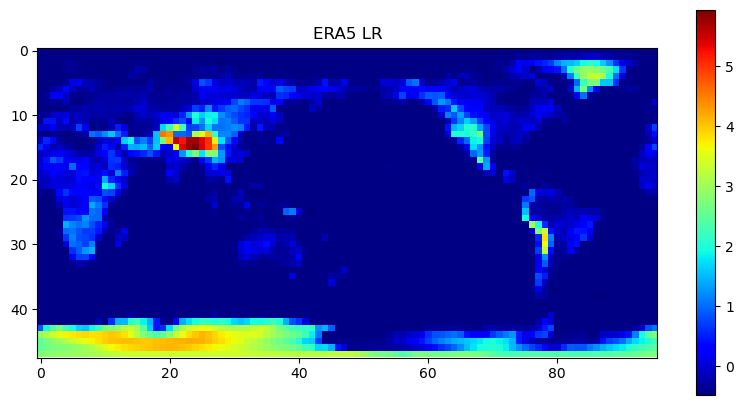

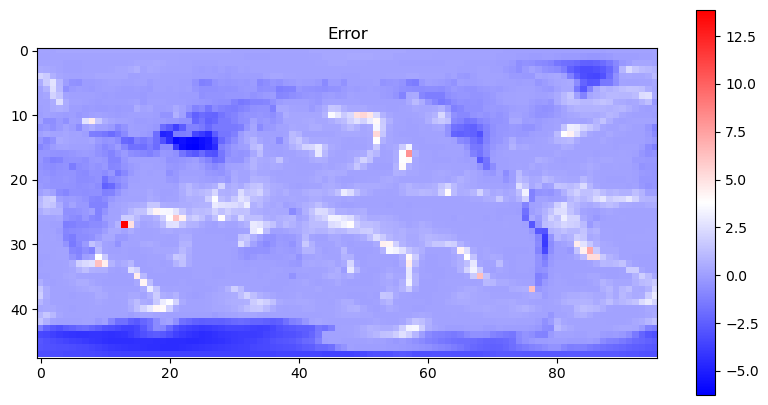

LUCIE:  tensor(-0.0375) tensor(0.7072)
ERA5 LR:  0.0 1.0


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import matplotlib.colors as colors
import numpy as np

idx = 1000
for ch in range(6):
    # Have axis to be twice the size of y axis
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.imshow(lucie_tensor[ch], cmap='jet')
    plt.colorbar()
    plt.title('LUCIE')
    plt.show()
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.imshow(dataset[0]['input'][ch].numpy(), cmap='jet')
    plt.colorbar()
    plt.title('ERA5 LR')
    plt.show
    # Plot the error
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.imshow(lucie_tensor[ch] - dataset[0]['input'][ch].numpy(), cmap='bwr')
    plt.colorbar()
    plt.title('Error')
    plt.show()

    # Print the mean and std of each
    print("LUCIE: ", lucie_tensor[ch].mean(), lucie_tensor[ch].std())
    print("ERA5 LR: ", dataset[0]['input'][ch].numpy().mean(), dataset[0]['input'][ch].numpy().std())




(8, 721, 1440)
(8, 721, 1440)


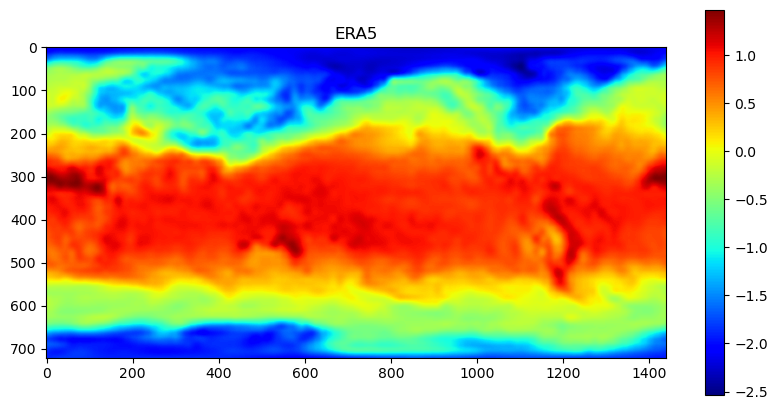

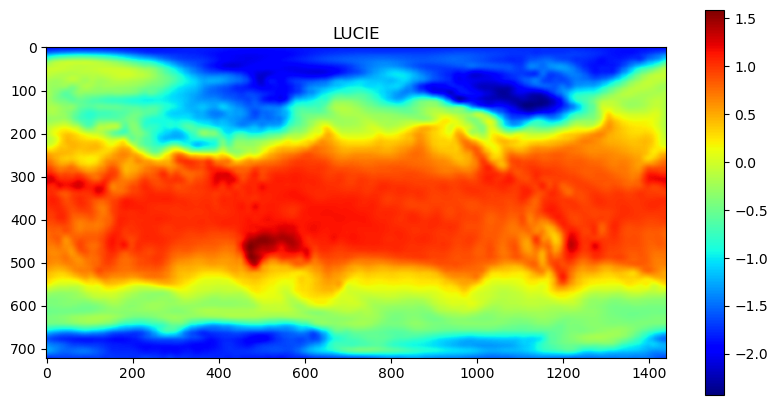

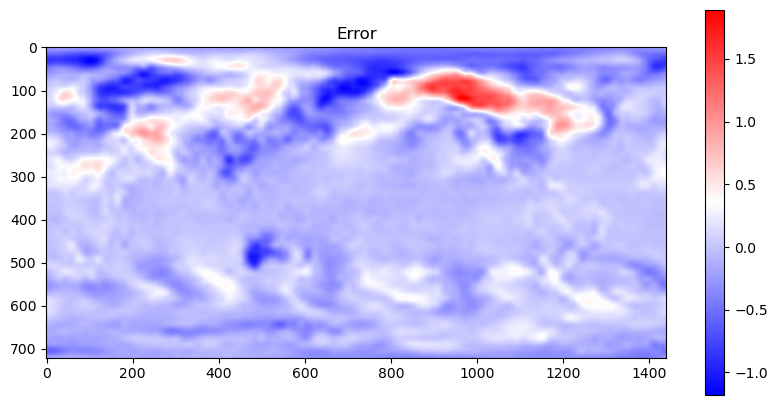

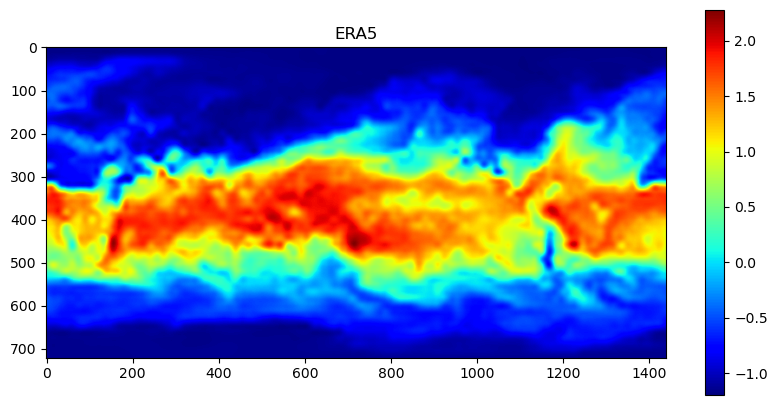

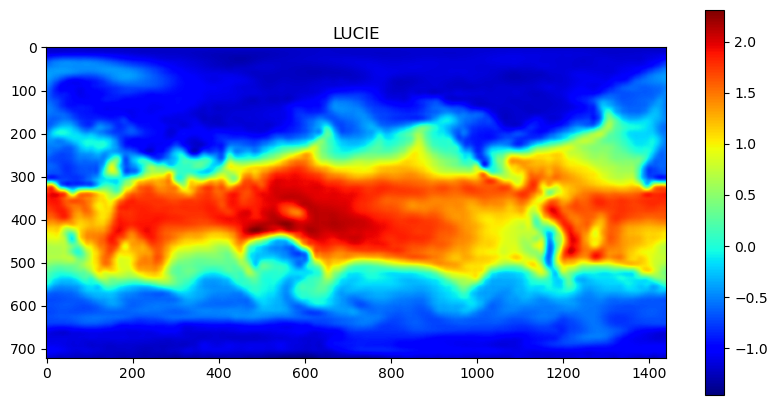

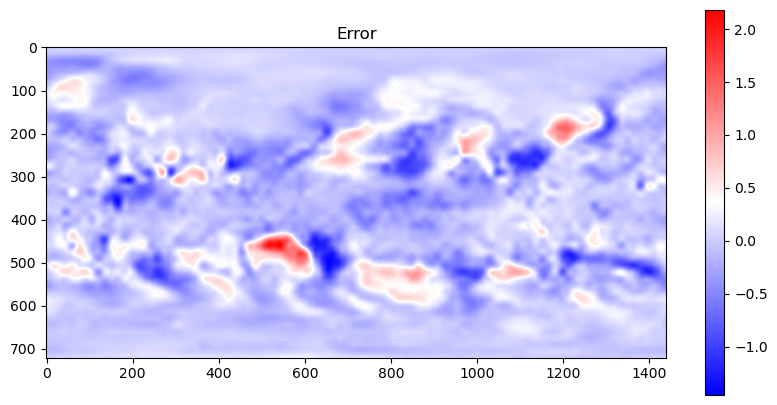

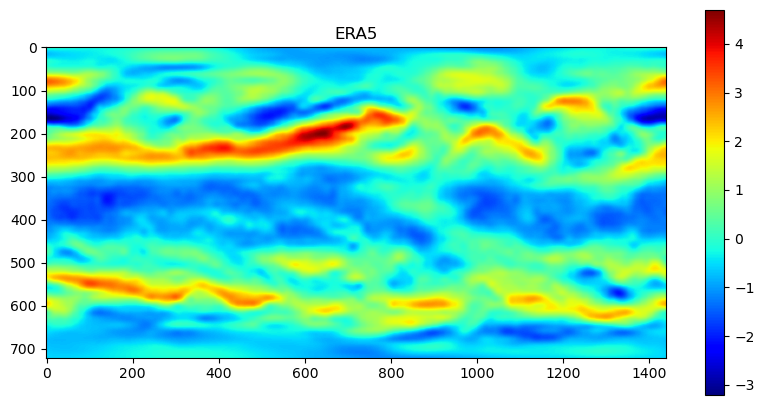

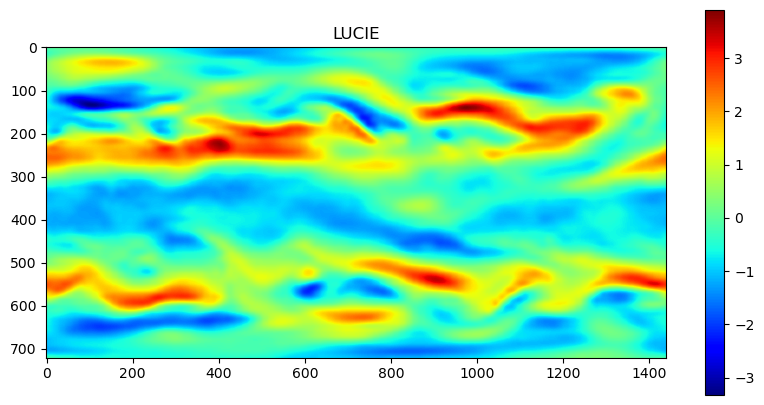

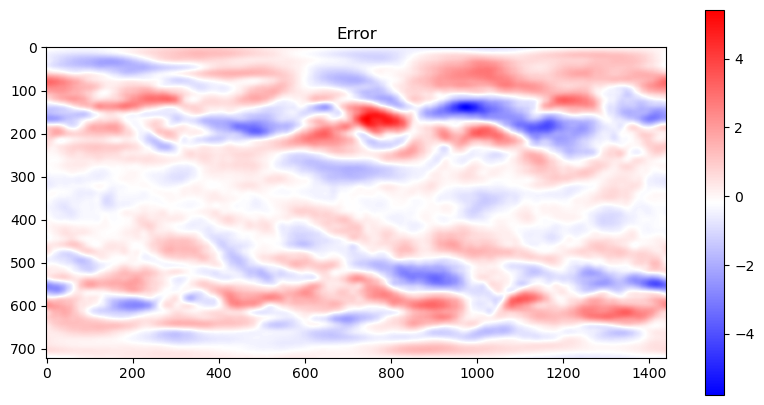

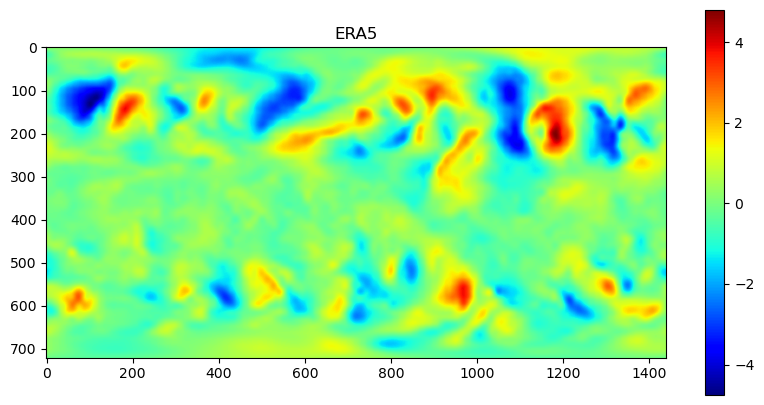

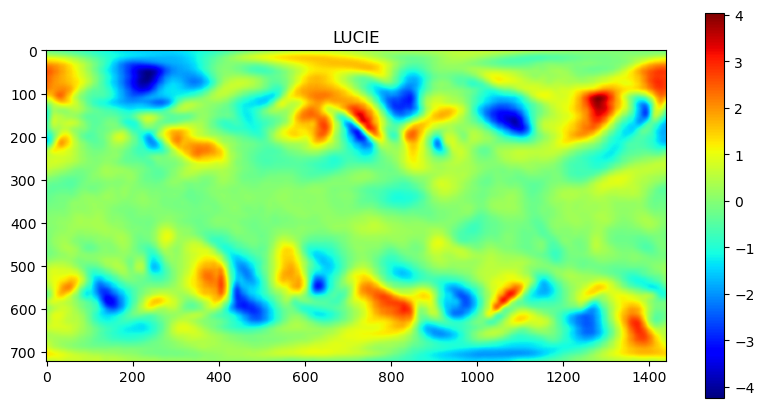

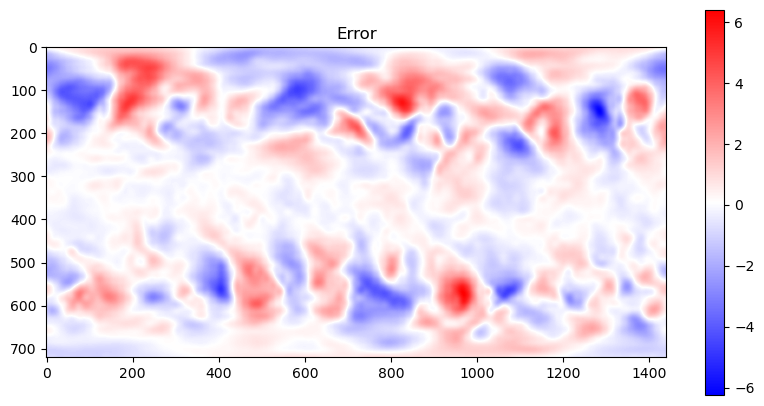

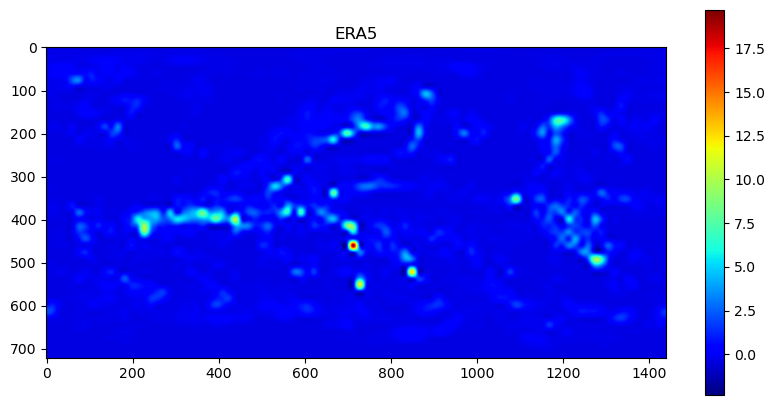

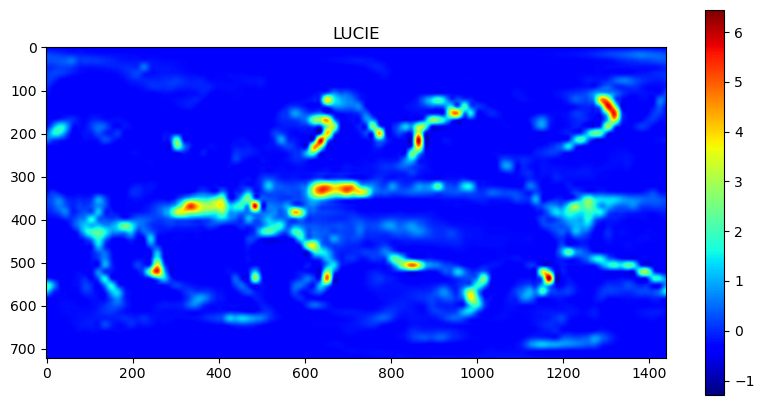

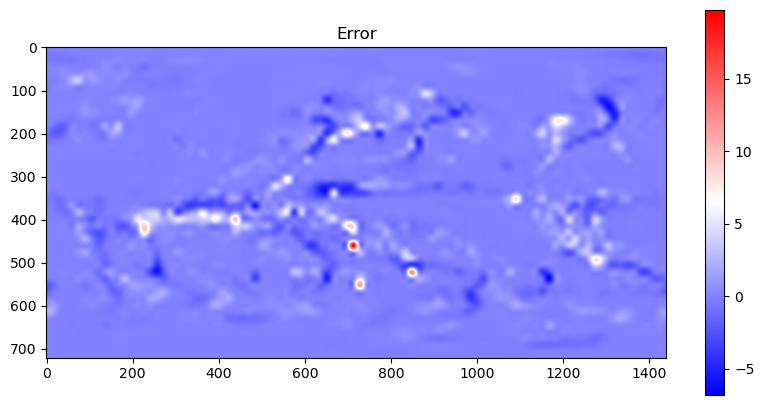

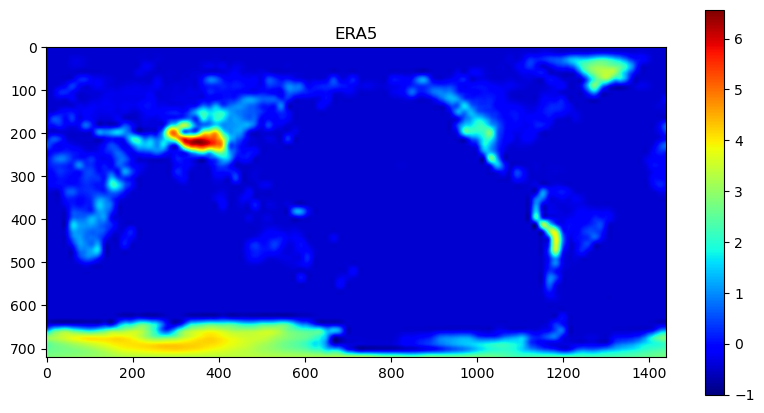

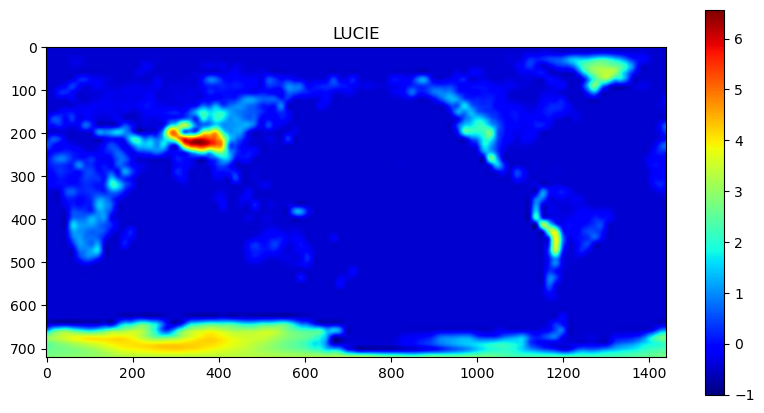

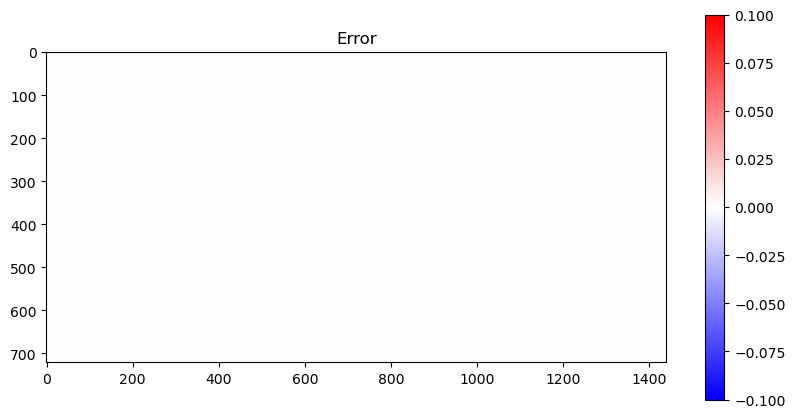

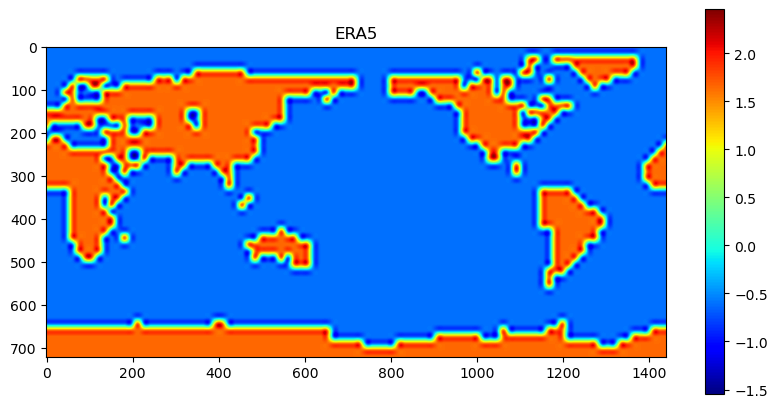

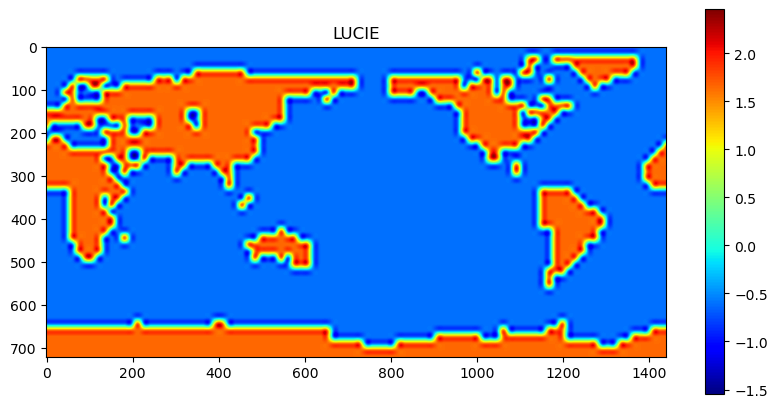

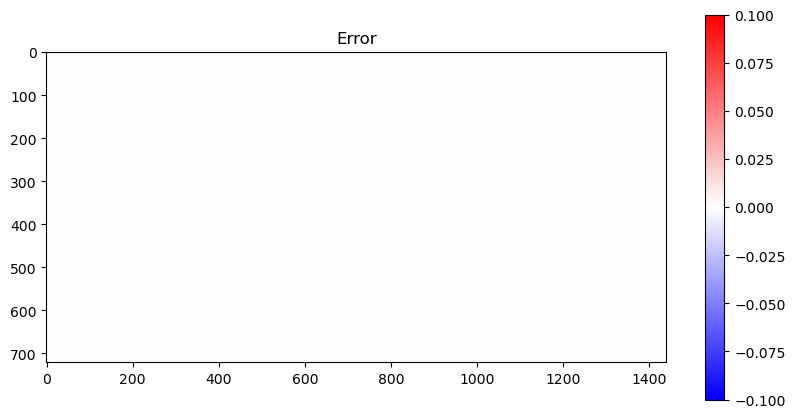

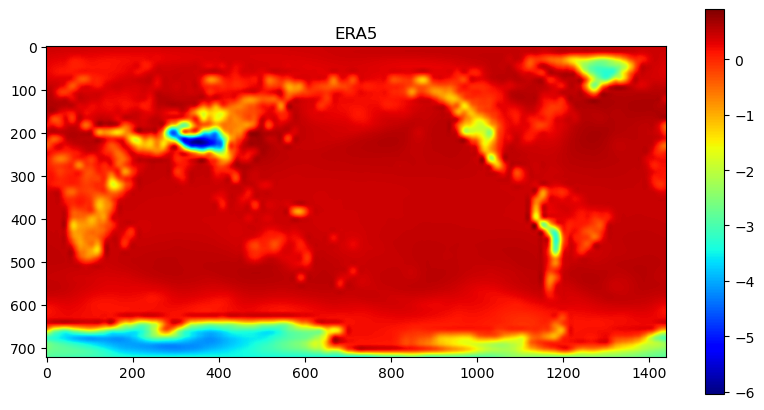

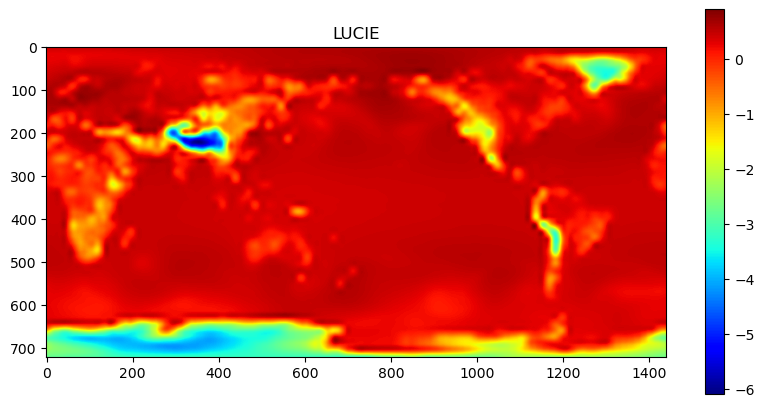

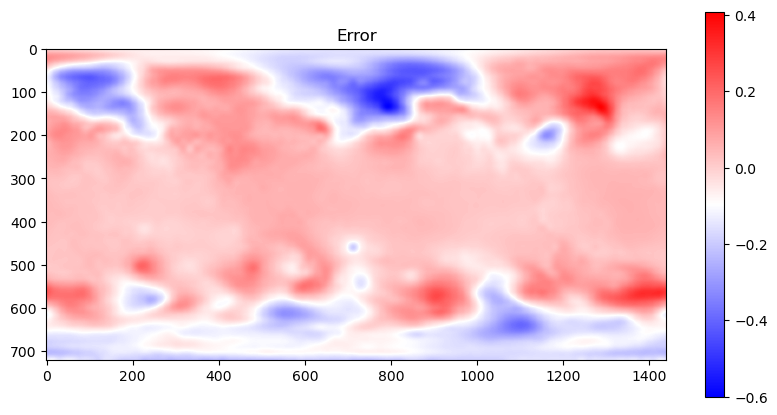

In [9]:
import numpy as np
import matplotlib.pyplot as plt

path_to_load = "/glade/derecho/scratch/mdarman/lucie/src/for_debugging.npz"
# Load the data
data = np.load(path_to_load, allow_pickle=True)
# Extract the data
print(data['lres_upsampled'].shape)
print(data['lucie_upsampled'].shape)

# Plot them all 
for ch in range(8):
    # Have axis to be twice the size of y axis
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.imshow(data['lres_upsampled'][ch], cmap='jet')
    plt.colorbar()
    plt.title('ERA5')
    plt.show()
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.imshow(data['lucie_upsampled'][ch], cmap='jet')
    plt.colorbar()
    plt.title('LUCIE')
    plt.show
    # Plot the error
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.imshow(data['lres_upsampled'][ch]-data['lucie_upsampled'][ch], cmap='bwr')
    plt.colorbar()
    plt.title('Error')
    plt.show()




Checked the regridded data to see if it's fine or not:

In [22]:
import numpy as np
import h5py
import matplotlib.pyplot as plt


path_to_load = "/glade/derecho/scratch/mdarman/ERA5_t30/test/test/2012_0000.h5"
with h5py.File(path_to_load, 'r') as f:
    print(f['input'].keys())
    # data = {var: f['input'][var][:] for var in ['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr', 'orography', 'land_sea_mask']}





<KeysViewHDF5 ['Specific_Humidity_0', 'Specific_Humidity_1', 'Specific_Humidity_2', 'Specific_Humidity_3', 'Specific_Humidity_4', 'Specific_Humidity_5', 'Specific_Humidity_6', 'Specific_Humidity_7', 'Temperature_0', 'Temperature_1', 'Temperature_2', 'Temperature_3', 'Temperature_4', 'Temperature_5', 'Temperature_6', 'Temperature_7', 'U-wind_0', 'U-wind_1', 'U-wind_2', 'U-wind_3', 'U-wind_4', 'U-wind_5', 'U-wind_6', 'U-wind_7', 'V-wind_0', 'V-wind_1', 'V-wind_2', 'V-wind_3', 'V-wind_4', 'V-wind_5', 'V-wind_6', 'V-wind_7', 'logp', 'orography', 'sst', 'time', 'tp6hr']>


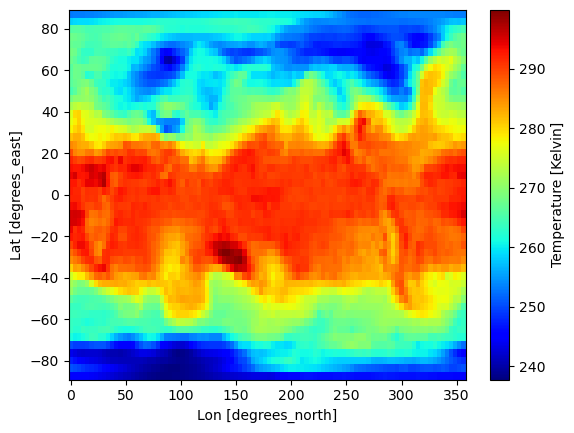

In [55]:
import xarray as xr
import datetime

ds_era = xr.open_dataset(f'/glade/derecho/scratch/mdarman/ERA5_hr_haiwen/t30_era5_2010-2017/era_5_y2017_regridded_mpi_fixed_var_gcc.nc')
ds_era
ds_era.isel(Timestep=1000, Sigma_Level=6)['Temperature'].plot(cmap='jet')

In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import glob

stages = ['test']

root_dir = '/glade/derecho/scratch/mdarman/ERA5_t30/test/'
mask = np.load('/glade/derecho/scratch/mdarman/ERA5_hr_haiwen/land_mask.npy').astype(np.float32)

for stage in stages:
    files = glob.glob(f'{root_dir}/{stage}/*.h5')
    files = sorted(files)
    for file in files:
        print(file)
        with h5py.File(file, "a") as f:
            f['input/land_sea_mask'] = mask



(48, 96)


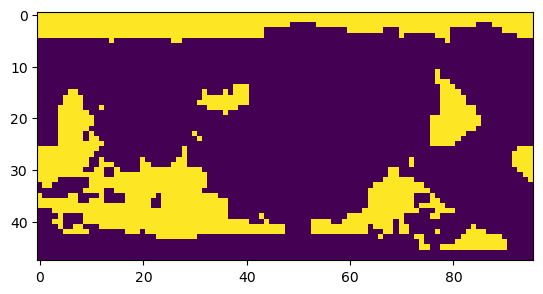

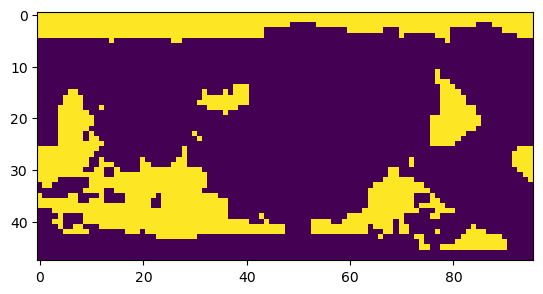

In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import glob

stages = ['val','test','train']

root_dir = '/glade/derecho/scratch/mdarman/lucie/src'




In [69]:
path = "/glade/derecho/scratch/asheshc/ERA5_t30/train/2000_0000.h5"
with h5py.File(path, 'r') as f:
    data = {var: f['input'][var][:] for var in ['land_sea_mask']}
    print(data['land_sea_mask'].shape)
    # Save land sea mask as sepreate npy file
    np.save('/glade/derecho/scratch/mdarman/ERA5_hr_haiwen/land_mask.npy', data['land_sea_mask'])



(48, 96)
